<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/DataAnalysis_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.



#### Project Title: Indian Start-up Funding Analysis(2018-2021): A Guide for Entreprenuers Interested in Venturing into The Indian Start-up Ecosystem

#### Project Description: This analysis is to give insight to entreprenuers who are seeking to venture into the Indian start-up ecosystem by highlighting key metrics to consider before venturing

#### Hypothesis: 1. 
####
####                       2.
####
#### Assumptions:
1. In the 2018 Amount if the amount does not begin with any currency symbol it will be considered as in dollars.
2. If the Year the company was founded and the year it was funded are the same, replace null values in the stage column with 'Seed' stage

#### Questions

1. How many companies were funded each year?
2. Which sectors had most startups each year?
3. What was the highest average funding yearly? 
4. Did Companies receive multiple funding through out the time period? What are the percentages?
5. Which cities had most startups?
6. Which Investors funded more startups?
7. Is there any correlation between the features?: 
6. What was the dominant startups in the top cities
9. What is the correlation between Company Age at the time of funding and Amount?
8. What is the relationship between the Amount and the top 4 Funding Stage?
10. What is the relationship between the top 3 Cities with more startups, the funding stage and the amount


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data manipulation and cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# load the datasets with pandas
df_2018 = pd.read_csv('startup_funding2018.csv')
df_2019 = pd.read_csv('startup_funding2019.csv')
df_2020 = pd.read_csv('startup_funding2020.csv')
df_2021 = pd.read_csv('startup_funding2021.csv')

print('Dataset loaded')

Dataset loaded


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

#### 2018 startup_funding dataset previewing

In [4]:
# Check the datatypes
df_2018.info()

# display  dataframe
df_2018.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


Company Name                                           Industry  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

  Round/Series       Amount                          Location  \
0         Seed       250000       Bangalore, Karnataka, India   
1         Seed  ₹40,000,000        Mumbai, Maharashtra, India   
2     Series A  ₹65,000,000           Gurgaon, Haryana, India   
3        Angel      2000000       Noida, Uttar Pradesh, India   
4         Seed            —  Hyderabad, Andhra Pradesh, India   

                                       About Company  
0  TheCollegeFever is a hub for fun, fiesta and f...  
1  A startup which aggregates milk from dairy far...  
2          Leading Online Loans Marketplace in India  
3  PayMe India is an innovative FinTech organizat...  
4  Eunimart is a one stop solution for merchants ...

#### 2019 startup_funding dataset previewing

In [5]:
# check the data types
df_2019.info()

# Display the dataframe
df_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor     Amount($)  \
0                               Sixth Sense Ventures    $6,300,000   
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN

In [6]:
# check null values 
df_2020[df_2020['Amount($)'].isna()]

Company/Brand Founded HeadQuarter              Sector  \
29          Delhivery    2011     Gurgaon          E-commerce   
44   PointOne Capital    2020   Bangalore  Venture capitalist   
235             Tring    2019      Mumbai        Social Media   

                                          What it does  \
29   Delhivery is a supply chain services company t...   
44                  Pre-seed/Seed focussed VC investor   
235  Tring is a celebrity engagement platform, for ...   

                                              Founders  \
29   Kapil Bharati, Mohit Tandon, Sahil Barua, Sura...   
44                                           Mihir Jha   
235        Akshay Saini, Rahul Saini, Pranav Chabhadia   

                                              Investor Amount($) Stage  \
29   Steadview Capital, Canada Pension Plan Investm...       NaN   NaN   
44                                                 NaN       NaN   NaN   
235                         Sujeet Kumar, Hemesh Singh       NaN   NaN   

    Unnamed: 9  
29         NaN  
44         NaN  
235        NaN

#### 2020 startup_funding dataset previewing

In [7]:
# check datatypes
df_2020.info()
# get the head of the data
df_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


Company/Brand Founded HeadQuarter              Sector  \
0    Aqgromalin    2019     Chennai            AgriTech   
1      Krayonnz    2019   Bangalore              EdTech   
2  PadCare Labs    2018        Pune  Hygiene management   
3         NCOME    2020   New Delhi              Escrow   
4    Gramophone    2016      Indore            AgriTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dhariya   
3                                      Ritesh Tiwari   
4  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   

                              Investor    Amount($)     Stage Unnamed: 9  
0                      Angel investors     $200,000       NaN        NaN  
1                      GSF Accelerator     $100,000  Pre-seed        NaN  
2                       Venture Center  Undisclosed  Pre-seed        NaN  
3  Venture Catalysts, PointOne Capital     $400,000       NaN        NaN  
4  Siana Capital Management, Info Edge     $340,000       NaN        NaN

### 2021 startup_funding dataset previewing

In [8]:
# check teh datatypes
df_2021.info()

# display data
df_2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


Company/Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   

                                        Investor     Amount($)         Stage  
0                    BEENEXT, Entrepreneur First    $1,200,000  Pre-series A  
1       Unilazer Ventures, IIFL Asset Management  $120,000,000           NaN  
2               GSV Ventures, Westbridge Capital   $30,000,000      Series D  
3                         CDC Group, IDG Capital   $51,000,000      Series C  
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal    $2,000,000          Seed

Observations made from the data

2018 Observations
- The columns in 2018 are different from 2019-2021 dataset
- The amount column has a mixture of Indian rupees and US dollar symbol
- The industry and location columns have multiple information

2019 Observations
- The founded column has  float data type
- The amount column has object data type. It has a dollar sign and commas

2020 Observations
- The amount column has object data type. It has a dollar sign and commas
- There's a column 'Unnamed: 9'

2021 Observations
- The amount column has object data type. It has a dollar sign and commas.
- The founded column has  float data type

# Cleaning Datasets

 #### Cleaning 2018

In [9]:
# Display dataframe 
df_2018

Company Name                                           Industry  \
0      TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1      Happy Cow Dairy                               Agriculture, Farming   
2           MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3          PayMe India                        Financial Services, FinTech   
4             Eunimart                 E-Commerce Platforms, Retail, SaaS   
..                 ...                                                ...   
521              Udaan   B2B, Business Development, Internet, Marketplace   
522  Happyeasygo Group                                    Tourism, Travel   
523             Mombay         Food and Beverage, Food Delivery, Internet   
524         Droni Tech                             Information Technology   
525            Netmeds         Biotechnology, Health Care, Pharmaceutical   

    Round/Series       Amount                          Location  \
0           Seed       250000       Bangalore, Karnataka, India   
1           Seed  ₹40,000,000        Mumbai, Maharashtra, India   
2       Series A  ₹65,000,000           Gurgaon, Haryana, India   
3          Angel      2000000       Noida, Uttar Pradesh, India   
4           Seed            —  Hyderabad, Andhra Pradesh, India   
..           ...          ...                               ...   
521     Series C    225000000       Bangalore, Karnataka, India   
522     Series A            —           Haryana, Haryana, India   
523         Seed         7500        Mumbai, Maharashtra, India   
524         Seed  ₹35,000,000        Mumbai, Maharashtra, India   
525     Series C     35000000        Chennai, Tamil Nadu, India   

                                         About Company  
0    TheCollegeFever is a hub for fun, fiesta and f...  
1    A startup which aggregates milk from dairy far...  
2            Leading Online Loans Marketplace in India  
3    PayMe India is an innovative FinTech organizat...  
4    Eunimart is a one stop solution for merchants ...  
..                                                 ...  
521  Udaan is a B2B trade platform, designed specif...  
522            HappyEasyGo is an online travel domain.  
523  Mombay is a unique opportunity for housewives ...  
524  Droni Tech manufacture UAVs and develop softwa...  
525       Welcome to India's most convenient pharmacy!  

[526 rows x 6 columns]

In [10]:
# check for duplicates in rows
df_2018.duplicated().sum()

1

In [11]:
# drop duplicates
df_2018.drop_duplicates(inplace=True)

In [12]:
# comfirm duplicates have been dropped
print(df_2018.duplicated().sum())

0


In [13]:
# split location and Industry into list and get first item
df_2018['Industry'] = df_2018['Industry'].str.split(',').str[0]
df_2018['Location'] = df_2018['Location'].str.split(',').str[0]

In [14]:
# confirm splitting of columns: Location and Industry
df_2018[['Industry', 'Location']]

Industry   Location
0           Brand Marketing  Bangalore
1               Agriculture     Mumbai
2                    Credit    Gurgaon
3        Financial Services      Noida
4      E-Commerce Platforms  Hyderabad
..                      ...        ...
521                     B2B  Bangalore
522                 Tourism    Haryana
523       Food and Beverage     Mumbai
524  Information Technology     Mumbai
525           Biotechnology    Chennai

[525 rows x 2 columns]

In [15]:
# Let' clean the Amount column
# replace commas and extract numbers to create a new column
df_2018['Amount($)'] = df_2018['Amount'].str.replace(',', '').str.extract(r'(\d+)').astype(float)      

In [16]:
# Let's assume the amount with no amount sign is already in dollars 
# loop through both Amount and Amount$ and convert Rupees into Dollars
for i in range(len(df_2018['Amount'])):
    df_2018.reset_index(drop=True, inplace=True)
    if df_2018.loc[i, 'Amount'][0] == '₹':
        df_2018.loc[i, 'Amount($)'] = df_2018.loc[i, 'Amount($)'] * 0.0146

In [17]:
# create a copy of the 2018 datframe
df_2018_copy = df_2018.copy()
df_2018_copy.head()

Company Name              Industry Round/Series       Amount   Location  \
0  TheCollegeFever       Brand Marketing         Seed       250000  Bangalore   
1  Happy Cow Dairy           Agriculture         Seed  ₹40,000,000     Mumbai   
2       MyLoanCare                Credit     Series A  ₹65,000,000    Gurgaon   
3      PayMe India    Financial Services        Angel      2000000      Noida   
4         Eunimart  E-Commerce Platforms         Seed            —  Hyderabad   

                                       About Company  Amount($)  
0  TheCollegeFever is a hub for fun, fiesta and f...   250000.0  
1  A startup which aggregates milk from dairy far...   584000.0  
2          Leading Online Loans Marketplace in India   949000.0  
3  PayMe India is an innovative FinTech organizat...  2000000.0  
4  Eunimart is a one stop solution for merchants ...        NaN

In [18]:
# drop Amount column
df_2018_copy.drop(columns=['Amount'], inplace=True)
# Create Year of Funding column
df_2018_copy['Year of Funding'] = '2018'
#Create Funding Status column
df_2018_copy['Funding Status'] = 'Disclosed'

In [19]:
# Check the shape of the dataframe
print(df_2018_copy.shape)
df_2018_copy.head()

(525, 8)


Company Name              Industry Round/Series   Location  \
0  TheCollegeFever       Brand Marketing         Seed  Bangalore   
1  Happy Cow Dairy           Agriculture         Seed     Mumbai   
2       MyLoanCare                Credit     Series A    Gurgaon   
3      PayMe India    Financial Services        Angel      Noida   
4         Eunimart  E-Commerce Platforms         Seed  Hyderabad   

                                       About Company  Amount($)  \
0  TheCollegeFever is a hub for fun, fiesta and f...   250000.0   
1  A startup which aggregates milk from dairy far...   584000.0   
2          Leading Online Loans Marketplace in India   949000.0   
3  PayMe India is an innovative FinTech organizat...  2000000.0   
4  Eunimart is a one stop solution for merchants ...        NaN   

  Year of Funding Funding Status  
0            2018      Disclosed  
1            2018      Disclosed  
2            2018      Disclosed  
3            2018      Disclosed  
4            2018      Disclosed

In [20]:
# check the null values in each column of the dateframe
df_2018_copy.isnull().sum()

Company Name         0
Industry             0
Round/Series         0
Location             0
About Company        0
Amount($)          148
Year of Funding      0
Funding Status       0
dtype: int64

In [21]:
pd.options.display.float_format = '{:.1f}'.format
df_2018_copy['Amount($)'].value_counts().head(4)

1000000.0    27
2000000.0    15
500000.0     13
730000.0      9
Name: Amount($), dtype: int64

In [22]:
# # fill null values with the mode in the Amount($) column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer_18 = imputer.fit(df_2018_copy[['Amount($)']])
df_2018_copy['Amount($)'] = imputer_18.transform(df_2018_copy[['Amount($)']])
df_2018_copy['Amount($)'].head()

0    250000.0
1    584000.0
2    949000.0
3   2000000.0
4   1000000.0
Name: Amount($), dtype: float64

In [23]:
# comfirm null value have been replaced
df_2018_copy['Amount($)'].isnull().sum()

0

In [24]:
# check for duplicates in the Company Name
df_2018_copy.duplicated(['Company Name']).sum()

0

In [25]:
### Suppress scietific notations in budget_adj and revenue_adj
pd.options.display.float_format = '{:.1f}'.format
df_2018_copy.head(10)

Company Name              Industry Round/Series   Location  \
0     TheCollegeFever       Brand Marketing         Seed  Bangalore   
1     Happy Cow Dairy           Agriculture         Seed     Mumbai   
2          MyLoanCare                Credit     Series A    Gurgaon   
3         PayMe India    Financial Services        Angel      Noida   
4            Eunimart  E-Commerce Platforms         Seed  Hyderabad   
5              Hasura  Cloud Infrastructure         Seed  Bengaluru   
6           Tripshelf              Internet         Seed    Kalkaji   
7        Hyperdata.IO       Market Research        Angel  Hyderabad   
8        Freightwalla  Information Services         Seed     Mumbai   
9  Microchip Payments       Mobile Payments         Seed  Bangalore   

                                       About Company  Amount($)  \
0  TheCollegeFever is a hub for fun, fiesta and f...   250000.0   
1  A startup which aggregates milk from dairy far...   584000.0   
2          Leading Online Loans Marketplace in India   949000.0   
3  PayMe India is an innovative FinTech organizat...  2000000.0   
4  Eunimart is a one stop solution for merchants ...  1000000.0   
5  Hasura is a platform that allows developers to...  1600000.0   
6  Tripshelf is an online market place for holida...   233600.0   
7  Hyperdata combines advanced machine learning w...   730000.0   
8  Freightwalla is an international forwarder tha...  1000000.0   
9  Microchip payments is a mobile-based payment a...  1000000.0   

  Year of Funding Funding Status  
0            2018      Disclosed  
1            2018      Disclosed  
2            2018      Disclosed  
3            2018      Disclosed  
4            2018      Disclosed  
5            2018      Disclosed  
6            2018      Disclosed  
7            2018      Disclosed  
8            2018      Disclosed  
9            2018      Disclosed

#### Cleaning 2019


In [26]:
# display dataframe
df_2019.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor     Amount($)  \
0                               Sixth Sense Ventures    $6,300,000   
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN

In [27]:
# Check for duplicated rows
df_2019.duplicated().sum()

0

In [28]:
# check for duplicates iin the Company/Brand column
df_2019.duplicated('Company/Brand').sum()

2

In [29]:
# display duplicate name in Company/Brand column
brand_duplicates_2019 = df_2019[df_2019.duplicated('Company/Brand')]['Company/Brand'].tolist()
brand_duplicates_2019

['Licious', 'Kratikal']

In [30]:
# display rows with duplicated company names
dup_19 = df_2019[df_2019['Company/Brand'].isin(brand_duplicates_2019)].sort_values(by='Company/Brand')
dup_19

Company/Brand  Founded    HeadQuarter      Sector  \
7       Kratikal   2013.0          Noida  Technology   
82      Kratikal      NaN  Uttar pradesh  Technology   
30       Licious      NaN      Bangalore        Food   
68       Licious   2015.0      Bangalore        Food   

                                         What it does  \
7   It is a product-based cybersecurity solutions ...   
82                  Provides cyber security solutions   
30                                   Online meat shop   
68                                   Online meat shop   

                                           Founders  \
7   Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa   
82                                   Pavan Kushwaha   
30                       Vivek Gupta, Abhay Hanjura   
68                       Vivek Gupta, Abhay Hanjura   

                                      Investor    Amount($)         Stage  
7   Gilda VC, Art Venture, Rajeev Chitrabhanu.   $1,000,000  Pre series A  
82   Gilda VC, Art Venture, Rajeev Chitrabhanu   $1,000,000  Pre-series A  
30                          Vertex Growth Fund  $30,000,000      Series E  
68                             Vertex Ventures  $25,000,000      Series D

In [31]:
# replace year with 2015
df_2019.loc[30, 'Founded']=2015

# drop first columns of duplicates
df_2019.drop_duplicates(keep='first', subset='Company/Brand', inplace=True)

In [32]:
# comfirm dropped duplicates in Company/Nmae
df_2019.duplicated('Company/Brand').sum()

0

In [33]:
# filter dataframe with 'undisclosed' in the Amount$ column 
undisclosed = df_2019[df_2019['Amount($)'].str.match('U.+')]
undisclosed

Company/Brand  Founded HeadQuarter            Sector  \
5                       FlytBase      NaN        Pune        Technology   
6                          Finly      NaN   Bangalore              SaaS   
10                    Cub McPaws   2010.0      Mumbai   E-commerce & AR   
14                   Open Secret      NaN         NaN         Food tech   
19  Azah Personal Care Pvt. Ltd.   2018.0    Gurugram            Health   
23            DROR Labs Pvt. Ltd   2018.0       Delhi       Safety tech   
32                      Pumpkart   2014.0  Chandigarh     E-marketplace   
45                        Afinoz      NaN       Noida           Fintech   
54                     Ninjacart   2015.0         NaN  B2B Supply Chain   
55                   Binca Games   2014.0      Mumbai             Games   
65                  Cubical Labs   2013.0         NaN               IoT   
75                      Sportido   2015.0       Noida            Sports   

                                         What it does  \
5                         A drone automation platform   
6   It builds software products that makes work si...   
10  A B2C  brand that focusses on premium and comf...   
14           It produces and sells top quality snacks   
19  Aims to solve some problems in the feminine hy...   
23  It uses technology to create a trust-based net...   
32   B2B model for appliances and electrical products   
45  Online financial marketplace for customized ra...   
54  It connects producers of food directly to reta...   
55  It offers games that are available across Indi...   
65                  Home automation solution provider   
75  It is a sports discovery app that helps to fin...   

                                            Founders  \
5                                        Nitin Gupta   
6                          Vivek AG, Veekshith C Rai   
10                           Abhay Bhat, Kinnar Shah   
14                       Ahana Gautam, Udit Kejriwal   
19                          Mohammed, Shashwat Diesh   
23                    Dhiraj Naubhar, Dheeraj Bansal   
32                                         KS Bhatia   
45                                     Rachna Suneja   
54  Thirukumaran Nagarajanin, Vasudevan Chinnathambi   
55                     Rubianca Wadhwa, Sahil Wadhwa   
65                           Dhruv Ratra, Swati Vyas   
75              Neeraj Aggarwala, Akhil Ramachandran   

                                             Investor    Amount($)  \
5                                         Undisclosed  Undisclosed   
6   Social Capital, AngelList India, Gemba Capital...  Undisclosed   
10                                  Venture Catalysts  Undisclosed   
14                                    Matrix Partners  Undisclosed   
19                          Kunal Bahl, Rohit Bansal.  Undisclosed   
23                          Inflection Point Ventures  Undisclosed   
32                                         Dinesh Dua  Undisclosed   
45                             Fintech innovation lab  Undisclosed   
54                                  Walmart, Flipkart  Undisclosed   
55                                     Sunil Gavaskar  Undisclosed   
65                                   Rockstud Capital  Undisclosed   
75  Inflection Point Ventures, SucSEED Venture Par...  Undisclosed   

           Stage  
5            NaN  
6            NaN  
10           NaN  
14           NaN  
19  Pre series A  
23           NaN  
32           NaN  
45           NaN  
54           NaN  
55           NaN  
65      Series B  
75      Series B

In [34]:
# check the founding years for the companies
df_2019['Founded'].value_counts()

2015.0    12
2014.0     8
2016.0     7
2013.0     6
2018.0     6
2017.0     5
2010.0     4
2019.0     4
2011.0     3
2012.0     3
2008.0     1
2004.0     1
Name: Founded, dtype: int64

In [35]:
# Changing the data type of Founded column to a string
def clean_create_cols(data, fund_year):
    data['Amount($)'] = data["Amount($)"].replace({r"(\$$)": np.nan}, regex=True)
    # create a funsing status column
    data['Funding Status'] = data["Amount($)"].replace({r"(^[$\d].+)": "Disclosed"}, regex=True)
    # Changing the data type of Founded column to a string
    data["Amount($)"] = data["Amount($)"].replace({r"(\$U.+|\$u.+|U.+)": np.nan, "nan": np.nan}, regex=True)
    data["Amount($)"] = data["Amount($)"].replace({r"(\D)": ""}, regex=True).astype(float)
    # Adding a column to represent the year of funding
    data["Year of Funding"] = fund_year

In [36]:
# run fucntion to clean dataframe
clean_create_cols(df_2019, '2019')

In [37]:
df_2019.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor   Amount($)  \
0                               Sixth Sense Ventures   6300000.0   
1                                   General Atlantic 150000000.0   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey  28000000.0   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...  30000000.0   
4           Innovation in Food and Agriculture (IFA)   6000000.0   

           Stage Funding Status Year of Funding  
0            NaN      Disclosed            2019  
1       Series C      Disclosed            2019  
2  Fresh funding      Disclosed            2019  
3       Series D      Disclosed            2019  
4            NaN      Disclosed            2019

In [38]:
# create a copy of the 2019 datframe
df_2019_copy = df_2019.copy()
df_2019_copy.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor   Amount($)  \
0                               Sixth Sense Ventures   6300000.0   
1                                   General Atlantic 150000000.0   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey  28000000.0   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...  30000000.0   
4           Innovation in Food and Agriculture (IFA)   6000000.0   

           Stage Funding Status Year of Funding  
0            NaN      Disclosed            2019  
1       Series C      Disclosed            2019  
2  Fresh funding      Disclosed            2019  
3       Series D      Disclosed            2019  
4            NaN      Disclosed            2019

In [39]:
# confirm the unique values in the funding status column
df_2019_copy['Funding Status'].unique()

array(['Disclosed', 'Undisclosed'], dtype=object)

In [40]:
# check and confirm changed datatypes
df_2019_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 88
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    87 non-null     object 
 1   Founded          60 non-null     float64
 2   HeadQuarter      68 non-null     object 
 3   Sector           82 non-null     object 
 4   What it does     87 non-null     object 
 5   Founders         84 non-null     object 
 6   Investor         87 non-null     object 
 7   Amount($)        75 non-null     float64
 8   Stage            41 non-null     object 
 9   Funding Status   87 non-null     object 
 10  Year of Funding  87 non-null     object 
dtypes: float64(2), object(9)
memory usage: 8.2+ KB


In [41]:
# check duplicated Company names
df_2019_copy.duplicated('Company/Brand').sum()

0

In [42]:
# Filter out company which founded in 2019(same year it received funding)
founded_2019 = df_2019_copy[df_2019_copy['Founded']== 2019]
founded_2019



Company/Brand  Founded HeadQuarter           Sector  \
13     JobSquare   2019.0   Ahmedabad          HR tech   
25       Seekify   2019.0       Delhi             SaaS   
29         Bijak   2019.0         NaN         AgriTech   
78      IndyFint   2019.0   Bangalore  Virtual Banking   

                                         What it does  \
13  Technology-based platform that is connecting s...   
25       Customer Experience (CX) Automation platform   
29         B2B platform for agricultural commodities.   
78  It helps lenders to directly provide short-ter...   

                                             Founders  \
13                                       Ishit Jethwa   
25                       Arihant Jain, Ajeet Kushwaha   
29  Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwa...   
78                                  Paddy Padmanabhan   

                                             Investor  Amount($)  \
13                                      Titan Capital   140500.0   
25                                     Sequoia Capita  1500000.0   
29  Omnivore and Omidyar Network India, Sequoia Ca...  2500000.0   
78                                Saravanan Adiseshan  2100000.0   

           Stage Funding Status Year of Funding  
13           NaN      Disclosed            2019  
25  Seed funding      Disclosed            2019  
29     Seed fund      Disclosed            2019  
78      Series A      Disclosed            2019

In [43]:
# get index with empty stage
stage_null_2019 = founded_2019[founded_2019['Stage'].isnull()].index.tolist()
stage_null_2019

[13]

In [44]:
# fill stage null value with seed
df_2019_copy.at[stage_null_2019, 'Stage'] = 'Seed'

In [45]:
# confirm change of null values 
df_2019_copy[df_2019_copy['Stage'].isnull()]

Company/Brand  Founded HeadQuarter               Sector  \
0                 Bombay Shaving      NaN         NaN            Ecommerce   
4                       Nu Genes   2004.0   Telangana             AgriTech   
5                       FlytBase      NaN        Pune           Technology   
6                          Finly      NaN   Bangalore                 SaaS   
10                    Cub McPaws   2010.0      Mumbai      E-commerce & AR   
11                      Appnomic      NaN   Bangalore                 SaaS   
14                   Open Secret      NaN         NaN            Food tech   
15                        LivFin   2017.0       Delhi              Fintech   
16                        Byju's   2011.0         NaN               Edtech   
18                       Witblox   2014.0         NaN               Edtech   
20                    SalaryFits   2015.0         NaN              Fintech   
23            DROR Labs Pvt. Ltd   2018.0       Delhi          Safety tech   
24                       Medlife   2014.0   Bangalore       Pharmaceutical   
27                 Fireflies .ai      NaN         NaN                   AI   
31                         truMe      NaN         NaN                  IoT   
32                      Pumpkart   2014.0  Chandigarh        E-marketplace   
33             Asteria Aerospace   2011.0   Bangalore        Robotics & AI   
39  Lil’ Goodness and sCool meal      NaN   Bangalore     Food & Nutrition   
41                         VMate      NaN         NaN                  NaN   
42          Bombay Shirt Company   2012.0      Mumbai           E-commerce   
43                       Slintel   2016.0         NaN                 SaaS   
44                    MyGameMate      NaN   Bangalore             E-Sports   
45                        Afinoz      NaN       Noida              Fintech   
48                          Box8   2011.0      Mumbai             Foodtech   
54                     Ninjacart   2015.0         NaN     B2B Supply Chain   
55                   Binca Games   2014.0      Mumbai                Games   
58                         Origo   2010.0    Gurugram             AgriTech   
59                     WishADish      NaN       Delhi          Food & tech   
60                  Ecom Express   2012.0    Gurugram            Logistics   
61                 Stanza Living   2017.0       Delhi         Accomodation   
62                        PiBeam      NaN     Chennai      Automotive tech   
63                  Euler Motors      NaN       Delhi      Automotive tech   
66                      Lawyered   2015.0       Delhi           Legal tech   
67                       Cuemath   2013.0   Bangalore               Edtech   
69                    Nivesh.com   2016.0       Noida         Mutual Funds   
71               Smart Institute      NaN       Surat               Edtech   
74                         Credr   2014.0      Mumbai           Automobile   
76                        Phable   2018.0         NaN           Healthtech   
77                         Sarva      NaN     Chennai      Yoga & wellness   
79                     Zolostays   2015.0         NaN         Accomodation   
80                           Ola   2010.0   Bangalore       Transportation   
81                       Zoomcar   2013.0   Bangalore  Transport & Rentals   
85                           Oyo   2013.0    Gurugram          Hospitality   
87                        Spinny   2015.0       Delhi           Automobile   
88               Ess Kay Fincorp      NaN   Rajasthan              Banking   

                                         What it does  \
0          Provides a range of male grooming products   
4   It is a seed company engaged in production, pr...   
5                         A drone automation platform   
6   It builds software products that makes work si...   
10  A B2C  brand that focusses on premium and comf...   
11  It is a self-healing enterprise, the IT operat...   
14           It produces and se

In [46]:
# filter oout and check rows with undisclosed amount
undisclosed_2019  = df_2019_copy[df_2019_copy['Funding Status'] == 'Undisclosed']
undisclosed_2019.head(2)

Company/Brand  Founded HeadQuarter      Sector  \
5      FlytBase      NaN        Pune  Technology   
6         Finly      NaN   Bangalore        SaaS   

                                        What it does  \
5                        A drone automation platform   
6  It builds software products that makes work si...   

                    Founders  \
5                Nitin Gupta   
6  Vivek AG, Veekshith C Rai   

                                            Investor  Amount($) Stage  \
5                                        Undisclosed        NaN   NaN   
6  Social Capital, AngelList India, Gemba Capital...        NaN   NaN   

  Funding Status Year of Funding  
5    Undisclosed            2019  
6    Undisclosed            2019

In [47]:
disclosed_2019  = df_2019_copy[df_2019_copy['Funding Status'] == 'Disclosed']
print(disclosed_2019['Amount($)'].isnull().sum())
disclosed_2019.head(2)

0


Company/Brand  Founded HeadQuarter     Sector  \
0  Bombay Shaving      NaN         NaN  Ecommerce   
1       Ruangguru   2014.0      Mumbai     Edtech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   

                                Founders              Investor   Amount($)  \
0                     Shantanu Deshpande  Sixth Sense Ventures   6300000.0   
1  Adamas Belva Syah Devara, Iman Usman.      General Atlantic 150000000.0   

      Stage Funding Status Year of Funding  
0       NaN      Disclosed            2019  
1  Series C      Disclosed            2019

In [48]:
imputer_19 = imputer.fit(disclosed_2019[['Amount($)']])
disclosed_2019.loc[:, 'Amount($)'] = imputer_19.transform(disclosed_2019[['Amount($)']])
disclosed_2019['Amount($)'].isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


0

In [49]:
df_copy_2019 = pd.concat([disclosed_2019, undisclosed_2019], ignore_index = True)
df_copy_2019.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor   Amount($)  \
0                               Sixth Sense Ventures   6300000.0   
1                                   General Atlantic 150000000.0   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey  28000000.0   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...  30000000.0   
4           Innovation in Food and Agriculture (IFA)   6000000.0   

           Stage Funding Status Year of Funding  
0            NaN      Disclosed            2019  
1       Series C      Disclosed            2019  
2  Fresh funding      Disclosed            2019  
3       Series D      Disclosed            2019  
4            NaN      Disclosed            2019

#### Cleaning 2020

In [50]:
# display the dataframe 
df_2020.head()

Company/Brand Founded HeadQuarter              Sector  \
0    Aqgromalin    2019     Chennai            AgriTech   
1      Krayonnz    2019   Bangalore              EdTech   
2  PadCare Labs    2018        Pune  Hygiene management   
3         NCOME    2020   New Delhi              Escrow   
4    Gramophone    2016      Indore            AgriTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dhariya   
3                                      Ritesh Tiwari   
4  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   

                              Investor    Amount($)     Stage Unnamed: 9  
0                      Angel investors     $200,000       NaN        NaN  
1                      GSF Accelerator     $100,000  Pre-seed        NaN  
2                       Venture Center  Undisclosed  Pre-seed        NaN  
3  Venture Catalysts, PointOne Capital     $400,000       NaN        NaN  
4  Siana Capital Management, Info Edge     $340,000       NaN        NaN

In [51]:
# Dropping 'Unnamed:9' column in the dataFrame
df_2020.drop(columns='Unnamed: 9', inplace=True)

In [52]:
# check for duplicates in Company/Brand column
duplicates_2020 = df_2020[df_2020.duplicated('Company/Brand')].sort_values(by='Company/Brand')
duplicates_2020

Company/Brand Founded HeadQuarter                 Sector  \
852        Airmeet     NaN   Bangalore     Media & Networking   
884       AjnaLens    2014       Thane               Deeptech   
862           Arya     NaN       Noida               Agritech   
222         Arzooo    2016   Bangalore            Retail Tech   
559   Ather Energy    2013   Bangalore             Automobile   
...            ...     ...         ...                    ...   
367         Zomato    2008     Haryana         Food devlivery   
348         Zomato    2008     Haryana         Food devlivery   
1034        Zomato     NaN         NaN               Foodtech   
247         Zomato    2008    Gurugram               FoodTech   
392      mCaffeine    2015      Mumbai  Personal care startup   

                                           What it does  \
852   A platform to host, discover, and attend fully...   
884   It leverages technologies such as AR, VR & AI ...   
862   Provides post-harvest services across the agri...   
222   Retail tech platform empowering 300,000+ small...   
559                       Electric scooter manufacturer   
...                                                 ...   
367   Get online food delivery from restaurants near...   
348   Get online food delivery from restaurants near...   
1034  Online food delivery and restaurant discovery ...   
247   Zomato is a food delivery and restaurant disco...   
392   MCaffeine is a personal care brand that offers...   

                                           Founders  \
852         Lalit Mangal, Vinay Jaasti, Manoj Singh   
884      Pankaj Raut, Abhishek Tomar, Abhijit Patil   
862                                    Prasanna Rao   
222                Khushnud Khan, Rishi Raj Rathore   
559                       Tarun Mehta, Swapnil Jain   
...                                             ...   
367                 Deepinder Goyal, Pankaj Chaddah   
348                 Deepinder Goyal, Pankaj Chaddah   
1034                                Deepinder Goyal   
247   Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah   
392                   Tarun Sharma, Vikas Lachhwani   

                                               Investor     Amount($)  \
852                                         Accel India    $3,000,000   
884   Maharashtra Defence, Aerospace Venture Fund (M...    $1,500,000   
862                               LGT Lightstone Aspada    $6,000,000   
222                       3Lines, Jabbar Internet Group    $7,500,000   
559                                       Hero MotoCorp   $11,241,000   
...                                                 ...           ...   
367             MacRitchie Investments, Baillie Gifford  $100,000,000   
348             MacRitchie Investments, Baillie Gifford   $62,000,000   
1034                                      Ant Financial  $150,000,000   
247                       Kora, Tiger Global Management   $52,000,000   
392                       RPSG Ventures, Amicus Capital    $2,900,000   

             Stage  
852            NaN  
884   Pre series A  
862       Series B  
222       Series A  
559       Series C  
...            ...  
367            NaN  
348            NaN  
1034           NaN  
247            NaN  
392       Series B  

[150 rows x 9 columns]

In [53]:
# create a list for duplicated company names
brands_dup_2020 = duplicates_2020['Company/Brand'].to_list()
# filter out duplicated column names
df_2020[df_2020['Company/Brand'].isin(brands_dup_2020)].sort_values(by='Company/Brand')

Company/Brand Founded HeadQuarter                 Sector  \
419        Airmeet    2019   Bangalore           Tech Startup   
852        Airmeet     NaN   Bangalore     Media & Networking   
884       AjnaLens    2014       Thane               Deeptech   
177       AjnaLens    2014       Thane          AR/VR startup   
862           Arya     NaN       Noida               Agritech   
...            ...     ...         ...                    ...   
1034        Zomato     NaN         NaN               Foodtech   
801         Zomato     NaN    Gurugram               Foodtech   
15          Zomato    2008     Gurgaon          Food Delivery   
392      mCaffeine    2015      Mumbai  Personal care startup   
208      mCaffeine    2015      Mumbai              Cosmetics   

                                           What it does  \
419   Airmeet is an all-in-one events platform for v...   
852   A platform to host, discover, and attend fully...   
884   It leverages technologies such as AR, VR & AI ...   
177   AjnaLens develops AR/VR wearables primarily fo...   
862   Provides post-harvest services across the agri...   
...                                                 ...   
1034  Online food delivery and restaurant discovery ...   
801   Online food delivery and restaurant discovery ...   
15    Zomato is a food delivery and restaurant disco...   
392   MCaffeine is a personal care brand that offers...   
208   MCaffeine is a personal care brand that offers...   

                                           Founders  \
419    Lalit Mangal, Manoj Singh, Vinay Kumar Jasti   
852         Lalit Mangal, Vinay Jaasti, Manoj Singh   
884      Pankaj Raut, Abhishek Tomar, Abhijit Patil   
177      Abhijit Patil, Abhishek Tomar, Pankaj Raut   
862                                    Prasanna Rao   
...                                             ...   
1034                                Deepinder Goyal   
801                                 Deepinder Goyal   
15    Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah   
392                   Tarun Sharma, Vikas Lachhwani   
208                   Tarun Sharma, Vikas Lachhwani   

                                               Investor     Amount($)  \
419                   Global Founders Capital, Redpoint   $12,000,000   
852                                         Accel India    $3,000,000   
884   Maharashtra Defence, Aerospace Venture Fund (M...    $1,500,000   
177                         Mohsin Hani Al Bahrani, MoD    $1,000,000   
862                               LGT Lightstone Aspada    $6,000,000   
...                                                 ...           ...   
1034                                      Ant Financial  $150,000,000   
801                                     Pacific Horizon    $5,000,000   
15                        Kora, Tiger Global Management  $660,000,000   
392                       RPSG Ventures, Amicus Capital    $2,900,000   
208                       RPSG Ventures, Amicus Capital    $5,000,000   

             Stage  
419       Series A  
852            NaN  
884   Pre series A  
177         Bridge  
862       Series B  
...            ...  
1034           NaN  
801            NaN  
15             NaN  
392       Series B  
208       Series B  

[271 rows x 9 columns]

In [54]:
#Repacing string  value in company
df_2020.loc[df_2020['Company/Brand']=='True Balance', ['Amount($)', 'Stage']] = [28000000, 'Series C']
df_2020.loc[df_2020["Company/Brand"] == "Eruditus", ["Amount($)", "Stage"]] = [825000000, "Series D"]

In [55]:
# drop duplicated rows
df_2020.drop_duplicates(inplace= True)

In [56]:
# run function to clean data
clean_create_cols(df_2020, '2020')

In [57]:
# display head of the dataframe
df_2020.head()

Company/Brand Founded HeadQuarter              Sector  \
0    Aqgromalin    2019     Chennai            AgriTech   
1      Krayonnz    2019   Bangalore              EdTech   
2  PadCare Labs    2018        Pune  Hygiene management   
3         NCOME    2020   New Delhi              Escrow   
4    Gramophone    2016      Indore            AgriTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dhariya   
3                                      Ritesh Tiwari   
4  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   

                              Investor  Amount($)     Stage Funding Status  \
0                      Angel investors   200000.0       NaN      Disclosed   
1                      GSF Accelerator   100000.0  Pre-seed      Disclosed   
2                       Venture Center        NaN  Pre-seed    Undisclosed   
3  Venture Catalysts, PointOne Capital   400000.0       NaN      Disclosed   
4  Siana Capital Management, Info Edge   340000.0       NaN      Disclosed   

  Year of Funding  
0            2020  
1            2020  
2            2020  
3            2020  
4            2020

In [58]:
# create a copy of the 2020 dataframe
df_2020_copy = df_2020.copy()

In [59]:
# confirm change of datatype
df_2020_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1052 non-null   object 
 1   Founded          840 non-null    object 
 2   HeadQuarter      958 non-null    object 
 3   Sector           1039 non-null   object 
 4   What it does     1052 non-null   object 
 5   Founders         1040 non-null   object 
 6   Investor         1014 non-null   object 
 7   Amount($)        805 non-null    float64
 8   Stage            592 non-null    object 
 9   Funding Status   1049 non-null   object 
 10  Year of Funding  1052 non-null   object 
dtypes: float64(1), object(10)
memory usage: 98.6+ KB


In [60]:
# drop duplicates in Company/Brand column 
df_2020_copy.drop_duplicates(keep='first', subset='Company/Brand', inplace=True)
df_2020_copy.shape

(905, 11)

In [61]:
# filter out companies with Founding Year 2020
founded_2020 = df_2020_copy[df_2020_copy['Founded'] == '2020']
founded_2020['Stage'].value_counts()

Seed              15
Pre-seed           4
Pre-series A       3
Seed Round         2
Seed round         1
Series A           1
Pre seed round     1
Pre Series A       1
Name: Stage, dtype: int64

In [62]:
# display filtered dataframe
founded_2020.head(5)

Company/Brand Founded HeadQuarter                    Sector  \
3              NCOME    2020   New Delhi                    Escrow   
16         OurEye.ai    2020   Bangalore  Virtual auditing startup   
28             Voosh    2020   Bangalore             Food Industry   
44  PointOne Capital    2020   Bangalore        Venture capitalist   
47     Tinker Coders    2020       Noida                    EdTech   

                                         What it does  \
3                        Escrow-as-a-service platform   
16  Video intelligence solution for Enterprise Sta...   
28  Building India's largest digital food service ...   
44                 Pre-seed/Seed focussed VC investor   
47  Tinker Coder is a LIVE Online Platform through...   

                                          Founders  \
3                                    Ritesh Tiwari   
16  Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal   
28                                 Priyam Saraswat   
44                                       Mihir Jha   
47                                    Anoop Gautam   

                               Investor  Amount($)     Stage Funding Status  \
3   Venture Catalysts, PointOne Capital   400000.0       NaN      Disclosed   
16              100X VC, Amara Ventures   120000.0       NaN      Disclosed   
28                       Better Capital        NaN  Pre-seed    Undisclosed   
44                                  NaN        NaN       NaN            NaN   
47                STEMROBO Technologies        NaN      Seed    Undisclosed   

   Year of Funding  
3             2020  
16            2020  
28            2020  
44            2020  
47            2020

In [63]:
# get index with empty stage
stage_null_2020 = founded_2020[founded_2020['Stage'].isnull()].index.tolist()
stage_null_2020

[3, 16, 44, 57, 86, 91, 95, 121, 182, 188, 193, 329, 558, 838]

In [64]:
# replace null values with 'Seed Stage'
df_2020_copy.at[stage_null_2020, 'Stage'] = 'Seed'

In [65]:
# filter oout and check rows with undisclosed amount
undisclosed_2020  = df_2020_copy[df_2020_copy['Funding Status'] == 'Undisclosed']
undisclosed_2020.head(2)

Company/Brand Founded HeadQuarter               Sector  \
2  PadCare Labs    2018        Pune   Hygiene management   
7         Metvy    2018     Gurgaon  Networking platform   

                                        What it does          Founders  \
2   Converting bio-hazardous waste to harmless waste   Ajinkya Dhariya   
7  AI driven networking platform for individuals ...  Shawrya Mehrotra   

         Investor  Amount($)       Stage Funding Status Year of Funding  
2  Venture Center        NaN    Pre-seed    Undisclosed            2020  
7      HostelFund        NaN  Pre-series    Undisclosed            2020

In [66]:
disclosed_2020  = df_2020_copy[df_2020_copy['Funding Status'] == 'Disclosed']
print(disclosed_2020['Amount($)'].isnull().sum())
disclosed_2020.head(2)

0


Company/Brand Founded HeadQuarter    Sector  \
0    Aqgromalin    2019     Chennai  AgriTech   
1      Krayonnz    2019   Bangalore    EdTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   

                           Founders         Investor  Amount($)     Stage  \
0   Prasanna Manogaran, Bharani C L  Angel investors   200000.0       NaN   
1  Saurabh Dixit, Gurudutt Upadhyay  GSF Accelerator   100000.0  Pre-seed   

  Funding Status Year of Funding  
0      Disclosed            2020  
1      Disclosed            2020

In [67]:
imputer_20 = imputer.fit(disclosed_2020[['Amount($)']])
disclosed_2020['Amount($)'] = imputer_20.transform(disclosed_2020[['Amount($)']])
disclosed_2020['Amount($)'].isnull().sum()

<ipython-input-67-5a1a3f2f658e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disclosed_2020['Amount($)'] = imputer_20.transform(disclosed_2020[['Amount($)']])


0

In [68]:
df_copy_2020 = pd.concat([disclosed_2020, undisclosed_2020], ignore_index = True)
df_copy_2020.head()

Company/Brand Founded HeadQuarter    Sector  \
0    Aqgromalin    2019     Chennai  AgriTech   
1      Krayonnz    2019   Bangalore    EdTech   
2         NCOME    2020   New Delhi    Escrow   
3    Gramophone    2016      Indore  AgriTech   
4        qZense    2019   Bangalore  AgriTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2                       Escrow-as-a-service platform   
3  Gramophone is an AgTech platform enabling acce...   
4  qZense Labs is building the next-generation Io...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                      Ritesh Tiwari   
3  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   
4                       Rubal Chib, Dr Srishti Batra   

                                        Investor  Amount($)     Stage  \
0                                Angel investors   200000.0       NaN   
1                                GSF Accelerator   100000.0  Pre-seed   
2            Venture Catalysts, PointOne Capital   400000.0      Seed   
3            Siana Capital Management, Info Edge   340000.0       NaN   
4  Venture Catalysts, 9Unicorns Accelerator Fund   600000.0      Seed   

  Funding Status Year of Funding  
0      Disclosed            2020  
1      Disclosed            2020  
2      Disclosed            2020  
3      Disclosed            2020  
4      Disclosed            2020

#### Cleaning 2021

In [69]:
# display data
df_2021.head(10)

Company/Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   
5   Urban Company   2014.0   New Delhi   Home services   
6  Comofi Medtech   2018.0   Bangalore      HealthTech   
7     Qube Health   2016.0      Mumbai      HealthTech   
8        Vitra.ai   2020.0   Bangalore    Tech Startup   
9          Taikee   2010.0      Mumbai      E-commerce   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   
5  Urban Company (Formerly UrbanClap) is a home a...   
6   Comofi Medtech is a healthcare robotics startup.   
7  India's Most Respected Workplace Healthcare Ma...   
8  Vitra.ai is an AI-based video translation plat...   
9  Taikee is the ISO-certified, B2B e-commerce pl...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   
5  Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan   
6                                         Gururaj KB   
7                                        Gagan Kapur   
8                                     Akash Nidhi PS   
9                 Nidhi Ramachandran, Sachin Chhabra   

                                        Investor     Amount($)         Stage  
0                    BEENEXT, Entrepreneur First    $1,200,000  Pre-series A  
1       Unilazer Ventures, IIFL Asset Management  $120,000,000           NaN  
2               GSV Ventures, Westbridge Capital   $30,000,000      Series D  
3                         CDC Group, IDG Capital   $51,000,000      Series C  
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal    $2,000,000          Seed  
5                                     Vy Capital  $188,000,000           NaN  
6                              CIIE.CO, KIIT-TBI      $200,000           NaN  
7                      Inflection Point Ventures   Undisclosed  Pre-series A  
8                              Inflexor Ventures   Undisclosed           NaN  
9                                            NaN    $1,000,000           NaN

In [70]:
# ckeck for duplicate rows 
df_2021.duplicated().sum()

19

In [71]:
# drop duplicate rows
df_2021.drop_duplicates(inplace=True)

In [72]:
# confirm droppe rows
df_2021.duplicated().sum()

0

In [73]:
df_2021.loc[[86, 98, 242, 257, 538, 545, 551, 674, 677, 1100, 1137, 1146, 1148]]

Company/Brand  Founded             HeadQuarter  \
86              Onsurity   2020.0               Bangalore   
98               FanPlay   2020.0          Computer Games   
242   Fullife Healthcare   2009.0  Pharmaceuticals\t#REF!   
257              MoEVing   2021.0         Gurugram\t#REF!   
538          Little Leap   2020.0               New Delhi   
545            AdmitKard   2016.0                   Noida   
551                BHyve   2020.0                  Mumbai   
674         MYRE Capital   2020.0                  Mumbai   
677     Saarthi Pedagogy   2015.0               Ahmadabad   
1100            Sochcast   2020.0     Online Media\t#REF!   
1137           EventBeep   2019.0                    Pune   
1146                 MPL   2018.0               Bangalore   
1148           Godamwale   2016.0                  Mumbai   

                                                 Sector  \
86                                           HealthCare   
98                                       Computer Games   
242   Primary Business is Development and Manufactur...   
257   MoEVing is India's only Electric Mobility focu...   
538                                              EdTech   
545                                              EdTech   
551                                     Human Resources   
674                              Commercial Real Estate   
677                                              EdTech   
1100  Sochcast is an Audio experiences company that ...   
1137                                             EdTech   
1146                                             sports   
1148                           Logistics & Supply Chain   

                                           What it does  \
86    Onsurity is an employee healthcare platform pr...   
98    A real money game app specializing in trivia g...   
242                                        Varun Khanna   
257                         Vikash Mishra, Mragank Jain   
538                 Soft Skills that make Smart Leaders   
545   A tech solution for end to end career advisory...   
551   A Future of Work Platform for diffusing Employ...   
674                 Democratising Real Estate Ownership   
677   India's fastest growing Pedagogy company, serv...   
1100  CA Harvinderjit Singh Bhatia, Garima Surana, A...   
1137  An inclusive community where students are insp...   
1146  Mobile Premier League (MPL), is India’s larges...   
1148  Godamwale is tech enabled integrated logistics...   

                                               Founders  \
86                           Kulin Shah, Yogesh Agarwal   
98                                               YC W21   
242                  Morgan Stanley Private Equity Asia   
257      Anshuman Maheshwary, Dr Srihari Raju Kalidindi   
538   Holistic Development Programs for children in ...   
545    Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!   
551                                   Backed by 100x.VC   
674             Own rent yielding commercial properties   
677                                            Pedagogy   
1100            Vinners, Raj Nayak, Amritaanshu Agrawal   
1137    Saurabh Mangrulkar, Rakhi Pal, Venkatesh Prasad   
1146              Sai Srinivas Kiran GV, Shubh Malhotra   
1148          Basant Kumar, Vivek Tiwari, Ranbir Nandan   

                                               Investor  \
86                           Jitendra Gupta, Harsh Shah   
98                          Pritesh Kumar, Bharat Gupta   
242                                           $22000000   
257                                            $5000000   
538                                        Vishal Gupta   
545                                            $1000000   
551                     Omkar Pandharkame, Ketaki Ogale   
674                                         Aryaman Vir   
677                                      Sushil Agarwal   
1100                                       $Undisclosed   
1137  SucSEED  Indovation 

In [74]:
# Correcting misplaced value
df_2021.loc[df_2021["Company/Brand"] == "FanPlay", ["Founders", "Investor", "Amount($)", "Stage"]] = ["Pritesh Kumar, Bharat Gupta", "Upsparks", '$1200000', "Pre-series A"]
df_2021.loc[df_2021["Company/Brand"] == "Fullife Healthcare", ["HeadQuarter","Sector", "What it does","Founders", "Investor", "Amount($)", "Stage"]] = \
                                        ["", "Pharmaceuticals", "Primary Business is Development and Manufactur..."," Varun Khanna", "Morgan Stanley Private Equity Asia", '$22000000', "Series C"]
df_2021.loc[df_2021["Company/Brand"] == "MoEVing", ["Sector", "What it does", "Founders", "Investor", "Amount($)", "Stage"]] = \
                                        ["", "MoEVing is India's only Electric Mobility focu...", "Vikash Mishra, Mragank Jain", "Anshuman Maheshwary, Dr Srihari Raju Kalidindi", '$5000000', "Seed"]
df_2021.loc[df_2021["Company/Brand"] == "Little Leap", ["Founders", "Investor", "Amount($)", "Stage"]] = ['Vishal Gupta',"ah! Ventures", '$300000', ""]
df_2021.loc[df_2021["Company/Brand"] == "AdmitKard", [ "Investor", "Amount($)", "Stage"]] = ["", '$1000000', "Pre-series A"]
df_2021.loc[df_2021['Company/Brand'] == 'BHyve', ["Amount($)", "Stage", "Founders", "Investor"]] = ['$300000', '', 'Omkar Pandharkame, Ketaki Ogale','ITO Angel Network, LetsVenture']
df_2021.loc[df_2021["Stage"] == "$6000000", ["Founders", "Investor", "Amount($)", "Stage"]] = ["", "Aryaman Vir", '$6000000', "Seed"]
df_2021.loc[df_2021["Amount($)"] == 'JITO Angel Network, LetsVenture', ["Founders", "Investor", "Amount($)", "Stage"]] = ['Sushil Agarwal', 'JITO Angel Network, LetsVenture', '$1000000', '']
df_2021.loc[df_2021['Company/Brand'] == "Sochcast", ["HeadQuarter", "Sector", "What it does", "Founders", \
                                                    "Investor", "Amount($)", "Stage"]] = ["", "Online Media", "Sochcast is an Audio experiences company that ...", "CA Harvinderjit Singh Bhatia, Garima Surana", 
                                                    "Vinners, Raj Nayak, Amritaanshu Agrawal", "Undisclosed", ""]
df_2021.loc[df_2021["Company/Brand"] == "Godamwale", ["Amount($)", "Stage", "Investor"]] = ['$1000000', "Seed", "Anand Aryamane"]
df_2021.loc[df_2021["Amount($)"] == "ITO Angel Network LetsVenture", ["Amount($)", "Stage", "Investor"]] = ['$300000', "Angel", "ITO Angel Network LetsVenture"]


In [75]:
# check for duplicated Company names 
duplicate_2021 = df_2021[df_2021.duplicated('Company/Brand')]
duplicate_2021

Company/Brand  Founded HeadQuarter                             Sector  \
80              Uable   2020.0   Bangalore                             EdTech   
108       TartanSense   2015.0   Bangalore             Information Technology   
110         Kirana247   2018.0   New Delhi           Logistics & Supply Chain   
112           NeoDocs   2020.0      Mumbai                         Healthtech   
113     IsGoingOnline   2015.0      Cochin                             Retail   
...               ...      ...         ...                                ...   
1193  Sapio Analytics   2019.0      Mumbai                  Computer Software   
1195        Delhivery   2011.0    Gurugram           Logistics & Supply Chain   
1198           GoKwik   2020.0   New Delhi  Information Technology & Services   
1206     Leap Finance   2019.0   Bangalore                 Financial Services   
1207     CollegeDekho   2015.0    Gurugram                             EdTech   

                                           What it does  \
80    Uable are on a bold mission to redefine the fu...   
108   TartanSense unlocks value for small farm holde...   
110   An on-demand FMCG supply chain company leverag...   
112   Neodocs is a part of India's prominent Social ...   
113   Kochi-based digital catalogue and marketplace ...   
...                                                 ...   
1193  Sapio helps government create policies driven ...   
1195  Delhivery is a leading logistics and supply ch...   
1198  GoKwik is a platform for solving shopping expe...   
1206  International education loans for high potenti...   
1207  Collegedekho.com is Student’s Partner, Friend ...   

                                               Founders  \
80                                       Saurabh Saxena   
108                                        Jaisimha Rao   
110                 Tarun Jiwarajka, Pankhuri Jiwarajka   
112          Nikunj Malpani, Anurag Meena, Pratik Lodha   
113                                          Eobin Alex   
...                                                 ...   
1193  Hardik Somani, Ashwin Srivastava, Shripal Jain...   
1195                                        Sahil Barua   
1198         Ankush Talwar, Chirag Taneja, Vivek Bajpai   
1206                         Arnav Kumar, Vaibhav Singh   
1207                                       Ruchir Arora   

                                               Investor     Amount($)  \
80                        JAFCO Asia, Chiratae Ventures   $35,000,000   
108                       FMC, Omnivore, Blume Ventures      $5000000   
110                                                 NaN      $1000000   
112              Y Combinator, 9Unicorns, Titan Capital  $Undisclosed   
113      Unicorn India Ventures, SEA Fund, Devdatt Shah       $200000   
...                                                 ...           ...   
1193                        Rachit Poddar, Rajesh Gupta  $Undisclosed   
1195                                           Addition     $76000000   
1198  Matrix Partners India, Jitendra Gupta, RTP Global      $5000000   
1206                                       Owl Ventures     $55000000   
1207                   Winter Capital, ETS, Man Capital     $26000000   

             Stage  
80    Pre-series A  
108       Series A  
110   Pre-series A  
112       Pre-seed  
113   Pre-series A  
...            ...  
1193           NaN  
1195      Series I  
1198  Pre-series A  
1206      Series C  
1207      Series B  

[157 rows x 9 columns]

In [76]:
# create a list duplicated company names
brands_dup_2021 = duplicate_2021['Company/Brand'].to_list()
# filter out duplicated company names
df_2021[df_2021['Company/Brand'].isin(brands_dup_2021)].sort_values(by='Company/Brand')

Company/Brand  Founded HeadQuarter               Sector  \
104   Advantage Club   2014.0      Mumbai               HRTech   
877   Advantage Club   2014.0    Gurugram              HR Tech   
127            Akudo   2020.0   Bangalore              FinTech   
1090           Akudo   2020.0   Bangalore   Financial Services   
645             Apna   2019.0   Bangalore      Human Resources   
...              ...      ...         ...                  ...   
435            Zupee   2018.0     Gurgaon               Gaming   
38              boAt   2016.0   New Delhi          Electronics   
443             boAt   2016.0      Mumbai  Fashion & Lifestyle   
1             upGrad   2015.0      Mumbai               EdTech   
173           upGrad   2015.0      Mumbai               EdTech   

                                           What it does  \
104   Advantage Club is India's largest employee eng...   
877   Advantage Club is India's largest employee eng...   
127   Akudo is pioneering the concept of Learning-Fi...   
1090  A Learning-First Neobank for teenagers - Enabl...   
645   India's Professional App - Apna is dedicated t...   
...                                                 ...   
435   Zupee is a skill-based gaming app that enables...   
38    boAt is a consumer electronics and lifestyle c...   
443   boAt is a lifestyle brand that deals in fashio...   
1        UpGrad is an online higher education platform.   
173   upGrad is India’s largest online higher educat...   

                                               Founders  \
104                  Sourabh Deorah, Smiti Bhatt Deorah   
877                                      Sourabh Deorah   
127       Lavika Aggarwal, Sajal Khanna, Jagveer Gandhi   
1090      Lavika Aggarwal, Sajal Khanna, Jgaveer Gandhi   
645                                       Nirmit Parikh   
...                                                 ...   
435               Dilsher Singh Malhi, Siddhant Saurabh   
38                             Aman Gupta, Sameer Mehta   
443                            Aman Gupta, Sameer Mehta   
1     Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
173    Phalgun Kompalli, Ronnie Screwvala, Mayank Kumar   

                                               Investor     Amount($)  \
104            Y Combinator, Broom Ventures, Kunal Shah      $1700000   
877   Y Combinator, Jetty Ventures, Earlsfield Capit...      $3300000   
127                   Y Combinator, Incubate Fund India  $Undisclosed   
1090  Y Combinator, JAFCO Asia, Incubate Fund India,...      $4200000   
645                Sequoia Capital India, rocketship.vc     $70000000   
...                                                 ...           ...   
435       Orios Venture Partners, Matrix Partners India   $10,000,000   
38                    Qualcomm Ventures, Warburg Pincus    $6,000,000   
443                     InnoVen Capital, InnoVen Capita  $100,000,000   
1              Unilazer Ventures, IIFL Asset Management  $120,000,000   
173                              India Infoline Finance     $25000000   

             Stage  
104            NaN  
877   Pre-series A  
127       Pre-seed  
1090          Seed  
645       Series B  
...            ...  
435            NaN  
38             NaN  
443             PE  
1              NaN  
173            NaN  

[288 rows x 9 columns]

In [77]:
# drop rows with duplicated Company names
df_2021.drop_duplicates(keep='first', subset='Company/Brand', inplace=True)
df_2021.shape

(1033, 9)

In [78]:
# run function to clean data
clean_create_cols(df_2021, '2021')

In [79]:
# display data
df_2021.head(10)

Company/Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   
5   Urban Company   2014.0   New Delhi   Home services   
6  Comofi Medtech   2018.0   Bangalore      HealthTech   
7     Qube Health   2016.0      Mumbai      HealthTech   
8        Vitra.ai   2020.0   Bangalore    Tech Startup   
9          Taikee   2010.0      Mumbai      E-commerce   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   
5  Urban Company (Formerly UrbanClap) is a home a...   
6   Comofi Medtech is a healthcare robotics startup.   
7  India's Most Respected Workplace Healthcare Ma...   
8  Vitra.ai is an AI-based video translation plat...   
9  Taikee is the ISO-certified, B2B e-commerce pl...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   
5  Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan   
6                                         Gururaj KB   
7                                        Gagan Kapur   
8                                     Akash Nidhi PS   
9                 Nidhi Ramachandran, Sachin Chhabra   

                                        Investor   Amount($)         Stage  \
0                    BEENEXT, Entrepreneur First   1200000.0  Pre-series A   
1       Unilazer Ventures, IIFL Asset Management 120000000.0           NaN   
2               GSV Ventures, Westbridge Capital  30000000.0      Series D   
3                         CDC Group, IDG Capital  51000000.0      Series C   
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal   2000000.0          Seed   
5                                     Vy Capital 188000000.0           NaN   
6                              CIIE.CO, KIIT-TBI    200000.0           NaN   
7                      Inflection Point Ventures         NaN  Pre-series A   
8                              Inflexor Ventures         NaN           NaN   
9                                            NaN   1000000.0           NaN   

  Funding Status Year of Funding  
0      Disclosed            2021  
1      Disclosed            2021  
2      Disclosed            2021  
3      Disclosed            2021  
4      Disclosed            2021  
5      Disclosed            2021  
6      Disclosed            2021  
7    Undisclosed            2021  
8    Undisclosed            2021  
9      Disclosed            2021

In [80]:
# create a copy of the 2021 datrframe
df_2021_copy = df_2021.copy()
df_2021_copy.head(5)

Company/Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   

                                        Investor   Amount($)         Stage  \
0                    BEENEXT, Entrepreneur First   1200000.0  Pre-series A   
1       Unilazer Ventures, IIFL Asset Management 120000000.0           NaN   
2               GSV Ventures, Westbridge Capital  30000000.0      Series D   
3                         CDC Group, IDG Capital  51000000.0      Series C   
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal   2000000.0          Seed   

  Funding Status Year of Funding  
0      Disclosed            2021  
1      Disclosed            2021  
2      Disclosed            2021  
3      Disclosed            2021  
4      Disclosed            2021

In [81]:
# check the unique status in the funding status columns created
df_2021_copy['Funding Status'].unique()

array(['Disclosed', 'Undisclosed', nan], dtype=object)

In [82]:
# confirm  change of Amount column datatype
df_2021_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1033 non-null   object 
 1   Founded          1032 non-null   float64
 2   HeadQuarter      1032 non-null   object 
 3   Sector           1033 non-null   object 
 4   What it does     1033 non-null   object 
 5   Founders         1029 non-null   object 
 6   Investor         975 non-null    object 
 7   Amount($)        900 non-null    float64
 8   Stage            672 non-null    object 
 9   Funding Status   1031 non-null   object 
 10  Year of Funding  1033 non-null   object 
dtypes: float64(2), object(9)
memory usage: 96.8+ KB


In [83]:
# filter out companies which were founded in 2021
founded_2021 = df_2021_copy[df_2021_copy['Founded']== 2021]
founded_2021['Stage'].value_counts()

Seed            27
Pre-seed         6
Series A         4
Pre-series A     4
Series B         2
Series D         1
Series C         1
Name: Stage, dtype: int64

In [84]:
founded_2021 

Company/Brand  Founded HeadQuarter                 Sector  \
4         FypMoney   2021.0    Gurugram                FinTech   
30    Jambox Games   2021.0   Bangalore                 Gaming   
45         moEVing   2021.0    Gurugram              Logistics   
155       UpScalio   2021.0    Gurugram             E-commerce   
216      PayGlocal   2021.0   Bangalore     Financial Services   
...            ...      ...         ...                    ...   
1171           Jar   2021.0   Bangalore                FinTech   
1178       Dezerv.   2021.0      Mumbai  Investment Management   
1182     Sugar.fit   2021.0   Bangalore                 Health   
1192     Geniemode   2021.0    Gurugram                    B2B   
1197         Fleek   2021.0   Bangalore               Internet   

                                           What it does  \
4     FypMoney is Digital NEO Bank for Teenagers, em...   
30    A competitive game publishing platform to help...   
45    Delivering clean, cost-effective and efficient...   
155   UpScalio is India’s next generation, data-driv...   
216   PayGlocal is a FinTech solving for global paym...   
...                                                 ...   
1171  A daily gold-savings app that saves spare chan...   
1178  Integrated Portfolios designed by experts with...   
1182  Innovative technology, compassionate diabetes ...   
1192  Transforming global sourcing for retailers & s...   
1197  Fleek helps track & manage subscriptions in on...   

                                               Founders  \
4                                         Kapil Banwari   
30                                            Ravi Vyas   
45                                        VIKASH MISHRA   
155                                    Gautam Kshatriya   
216      Prachi Dharani, Rohit Sukhija, Yogesh Lokhande   
...                                                 ...   
1171                         Nishchay AG, Misbah Ashraf   
1178  Sandeep Jethwani, Vaibhav Porwal, Sahil Contra...   
1182                 Shivtosh Kumar, Madan Somasundaram   
1192                        Amit Sharma, Tanuj Gangwani   
1197                 Aditya Uttaravalli, Arvind Eashwar   

                                            Investor  Amount($)         Stage  \
4      Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal  2000000.0          Seed   
30                                               NaN  1100000.0          Seed   
45                                               NaN  1000000.0          Seed   
155                                              NaN 42000000.0           NaN   
216                            Sequoia Capital India  4900000.0      Series A   
...                                              ...        ...           ...   
1171  Tribe Capital, Arkam Ventures, WEH, Kunal Shah  4500000.0  Pre-series A   
1178        Elevation Capital, Matrix Partners India  7000000.0          Seed   
1182      Cure.fit, Endiya Partners, Tanglin Venture 10000000.0           NaN   
1192                              Info Edge Ventures  2000000.0           NaN   
1197                                          Axilor  1000000.0          Seed   

     Funding Status Year of Funding  
4         Disclosed            2021  
30        Disclosed            2021  
45        Disclosed            2021  
155       Disclosed            2021  
216       Disclosed            2021  
...             ...             ...  
1171      Disclosed            2021  
1178      Disclosed            2021  
1182      Disclosed            2021  
1192      Disclosed            2021  
1197      Disclosed            2021  

[66 rows x 11 columns]

In [85]:
# get index with empty stage
stage_null_2021 = founded_2021[founded_2021['Stage'].isnull()].index.tolist()
stage_null_2021

[155,
 235,
 273,
 284,
 307,
 553,
 599,
 659,
 843,
 907,
 920,
 922,
 952,
 956,
 988,
 1003,
 1080,
 1106,
 1135,
 1182,
 1192]

In [86]:
# replace null va;ues with seed
df_2021_copy.at[stage_null_2021, 'Stage'] = 'Seed'

In [87]:
# filter oout and check rows with undisclosed amount
undisclosed_2021  = df_2021_copy[df_2021_copy['Funding Status'] == 'Undisclosed']
undisclosed_2021.head(2)

Company/Brand  Founded HeadQuarter        Sector  \
7   Qube Health   2016.0      Mumbai    HealthTech   
8      Vitra.ai   2020.0   Bangalore  Tech Startup   

                                        What it does        Founders  \
7  India's Most Respected Workplace Healthcare Ma...     Gagan Kapur   
8  Vitra.ai is an AI-based video translation plat...  Akash Nidhi PS   

                    Investor  Amount($)         Stage Funding Status  \
7  Inflection Point Ventures        NaN  Pre-series A    Undisclosed   
8          Inflexor Ventures        NaN           NaN    Undisclosed   

  Year of Funding  
7            2021  
8            2021

In [88]:
disclosed_2021  = df_2021_copy[df_2021_copy['Funding Status'] == 'Disclosed']
print(disclosed_2021['Amount($)'].isnull().sum())
disclosed_2021.head(2)

89


Company/Brand  Founded HeadQuarter      Sector  \
0  Unbox Robotics   2019.0   Bangalore  AI startup   
1          upGrad   2015.0      Mumbai      EdTech   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   

                                   Investor   Amount($)         Stage  \
0               BEENEXT, Entrepreneur First   1200000.0  Pre-series A   
1  Unilazer Ventures, IIFL Asset Management 120000000.0           NaN   

  Funding Status Year of Funding  
0      Disclosed            2021  
1      Disclosed            2021

In [89]:
imputer_21 = imputer.fit(disclosed_2021[['Amount($)']])
disclosed_2021['Amount($)'] = imputer_21.transform(disclosed_2021[['Amount($)']])
disclosed_2021['Amount($)'].isnull().sum()

<ipython-input-89-9e28a7937227>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disclosed_2021['Amount($)'] = imputer_21.transform(disclosed_2021[['Amount($)']])


0

In [90]:
df_copy_2021 = pd.concat([disclosed_2021, undisclosed_2021], ignore_index = True)
df_copy_2021.head()

Company/Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   

                                        Investor   Amount($)         Stage  \
0                    BEENEXT, Entrepreneur First   1200000.0  Pre-series A   
1       Unilazer Ventures, IIFL Asset Management 120000000.0           NaN   
2               GSV Ventures, Westbridge Capital  30000000.0      Series D   
3                         CDC Group, IDG Capital  51000000.0      Series C   
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal   2000000.0          Seed   

  Funding Status Year of Funding  
0      Disclosed            2021  
1      Disclosed            2021  
2      Disclosed            2021  
3      Disclosed            2021  
4      Disclosed            2021

#### Merging all dataframes into one dataframe

In [91]:
# Joining all DataFrames with similar column names
combined_2019_2021 = pd.concat([df_2019_copy, df_2020_copy, df_2021_copy], ignore_index = True)
combined_2019_2021.columns = ["Company Name", "Year Founded", "Headquarters", "Sector", 
                              "Description", "Founders", "Investors", "Amount", "Funding Stage", "Funding Status", "Funding Year"]
combined_2019_2021.head()

Company Name Year Founded Headquarters           Sector  \
0  Bombay Shaving          NaN          NaN        Ecommerce   
1       Ruangguru       2014.0       Mumbai           Edtech   
2        Eduisfun          NaN       Mumbai           Edtech   
3        HomeLane       2014.0      Chennai  Interior design   
4        Nu Genes       2004.0    Telangana         AgriTech   

                                         Description  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                           Investors      Amount  \
0                               Sixth Sense Ventures   6300000.0   
1                                   General Atlantic 150000000.0   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey  28000000.0   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...  30000000.0   
4           Innovation in Food and Agriculture (IFA)   6000000.0   

   Funding Stage Funding Status Funding Year  
0            NaN      Disclosed         2019  
1       Series C      Disclosed         2019  
2  Fresh funding      Disclosed         2019  
3       Series D      Disclosed         2019  
4            NaN      Disclosed         2019

In [92]:
# Renaming the columns in the 2018 dataframe to match with the other dataframes
df_2018_copy.columns = ['Company Name', 'Sector', 'Funding Stage', 'Headquarters', 'Description', 'Amount', 'Funding Year', 'Funding Status']
df_2018_copy.head()

Company Name                Sector Funding Stage Headquarters  \
0  TheCollegeFever       Brand Marketing          Seed    Bangalore   
1  Happy Cow Dairy           Agriculture          Seed       Mumbai   
2       MyLoanCare                Credit      Series A      Gurgaon   
3      PayMe India    Financial Services         Angel        Noida   
4         Eunimart  E-Commerce Platforms          Seed    Hyderabad   

                                         Description    Amount Funding Year  \
0  TheCollegeFever is a hub for fun, fiesta and f...  250000.0         2018   
1  A startup which aggregates milk from dairy far...  584000.0         2018   
2          Leading Online Loans Marketplace in India  949000.0         2018   
3  PayMe India is an innovative FinTech organizat... 2000000.0         2018   
4  Eunimart is a one stop solution for merchants ... 1000000.0         2018   

  Funding Status  
0      Disclosed  
1      Disclosed  
2      Disclosed  
3      Disclosed  
4      Disclosed

In [93]:
# Joining the 2018 DataFrame to the 2019-2021 DataFrame
combined_set = pd.concat([df_2018_copy, combined_2019_2021], ignore_index = True)

combined_set

Company Name                    Sector Funding Stage Headquarters  \
0        TheCollegeFever           Brand Marketing          Seed    Bangalore   
1        Happy Cow Dairy               Agriculture          Seed       Mumbai   
2             MyLoanCare                    Credit      Series A      Gurgaon   
3            PayMe India        Financial Services         Angel        Noida   
4               Eunimart      E-Commerce Platforms          Seed    Hyderabad   
...                  ...                       ...           ...          ...   
2545          Voxelgrids                  Deeptech           NaN    Bangalore   
2546  Cogos Technologies  Logistics & Supply Chain  Pre-series A    Bangalore   
2547            Gigforce     Staffing & Recruiting  Pre-series A     Gurugram   
2548              Vahdam          Food & Beverages      Series D    New Delhi   
2549              WeRize        Financial Services      Series A    Bangalore   

                                            Description     Amount  \
0     TheCollegeFever is a hub for fun, fiesta and f...   250000.0   
1     A startup which aggregates milk from dairy far...   584000.0   
2             Leading Online Loans Marketplace in India   949000.0   
3     PayMe India is an innovative FinTech organizat...  2000000.0   
4     Eunimart is a one stop solution for merchants ...  1000000.0   
...                                                 ...        ...   
2545  Voxelgrids is an Magnetic Resonance Imaging te...  5000000.0   
2546  A smart-tech-enabled platform offering a one-s...  2000000.0   
2547                  A gig/on-demand staffing company.  3000000.0   
2548  VAHDAM is among the world’s first vertically i... 20000000.0   
2549  India’s first socially distributed full stack ...  8000000.0   

     Funding Year Funding Status Year Founded                       Founders  \
0            2018      Disclosed          NaN                            NaN   
1            2018      Disclosed          NaN                            NaN   
2            2018      Disclosed          NaN                            NaN   
3            2018      Disclosed          NaN                            NaN   
4            2018      Disclosed          NaN                            NaN   
...           ...            ...          ...                            ...   
2545         2021      Disclosed       2017.0              Arjun Arunachalam   
2546         2021      Disclosed       2016.0                 Prasad Sreeram   
2547         2021      Disclosed       2019.0    Chirag Mittal, Anirudh Syal   
2548         2021      Disclosed       2015.0                     Bala Sarda   
2549         2021      Disclosed       2019.0  Vishal Chopra, Himanshu Gupta   

                           Investors  
0                                NaN  
1                                NaN  
2                                NaN  
3                                NaN  
4                                NaN  
...                              ...  
2545                            Zoho  
2546                Transworld Group  
2547                 Endiya Partners  
2548                        IIFL AMC  
2549  3one4 Capital, Kalaari Capital  

[2550 rows x 11 columns]

In [94]:
# Check general info on combine dataset
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    2550 non-null   object 
 1   Sector          2539 non-null   object 
 2   Funding Stage   1783 non-null   object 
 3   Headquarters    2452 non-null   object 
 4   Description     2550 non-null   object 
 5   Amount          2180 non-null   float64
 6   Funding Year    2550 non-null   object 
 7   Funding Status  2545 non-null   object 
 8   Year Founded    1830 non-null   object 
 9   Founders        2006 non-null   object 
 10  Investors       1930 non-null   object 
dtypes: float64(1), object(10)
memory usage: 219.3+ KB


## Cleaning combined set

#### Removing irrelevant data

In [95]:
# dropping columns that wouldn't be used for analysis
combined_set.drop (['Description'],  axis=1, inplace=True)

combined_set.head()

Company Name                Sector Funding Stage Headquarters    Amount  \
0  TheCollegeFever       Brand Marketing          Seed    Bangalore  250000.0   
1  Happy Cow Dairy           Agriculture          Seed       Mumbai  584000.0   
2       MyLoanCare                Credit      Series A      Gurgaon  949000.0   
3      PayMe India    Financial Services         Angel        Noida 2000000.0   
4         Eunimart  E-Commerce Platforms          Seed    Hyderabad 1000000.0   

  Funding Year Funding Status Year Founded Founders Investors  
0         2018      Disclosed          NaN      NaN       NaN  
1         2018      Disclosed          NaN      NaN       NaN  
2         2018      Disclosed          NaN      NaN       NaN  
3         2018      Disclosed          NaN      NaN       NaN  
4         2018      Disclosed          NaN      NaN       NaN

#### Cleaning the Funding Stage column

In [96]:
# dictionaries of corection to clen the funding stage
Stage_corrections = {(r'Ang.+'): 'Angel', (r'Brid.+'): 'Bridge', (r'Debt.*'): 'Debt Financing', \
               (r'(Ear.+|Seed.*)'): 'Seed', (r'(S.+ies\sa.*)'): 'Series A',\
              (r'(S.+ies\sb.*)'): 'Series B', (r'(S.+ies\sc.*)'): 'Series C',\
              (r'(S.+ies\sd.*)'): 'Series D', (r'(S.+ies\sf.*)'): 'Series F',\
               (r'(S.+ies\se.*)'): 'Series E', (r'(S.+ies\sg.*)'): 'Series G', (r'(S.+ies\sh.*)'): 'Series H',\
              (r'(Htt.*|Ven.+|^$)'): 'Unknown', (r'(P.+ies\sa.*)'): 'Pre Series A',\
              (r'(P.+ies\sb.*)'): 'Pre Series B', (r'(P.+ies\sc.*)'): 'Pre Series C',\
              (r'(.*(f|F)un.+)'): 'Fresh Funding', (r'(.+seed.*)'): 'Pre Seed', np.nan: 'Unknown'}

In [97]:
# Run and effect changes in the dataset
combined_set['Funding Stage'] = combined_set['Funding Stage'].str.capitalize().replace(Stage_corrections, regex=True)


In [98]:
# get the number of unique stages
Stages = combined_set['Funding Stage'].sort_values().unique()
print(len(Stages))
Stages

29


array(['Angel', 'Bridge', 'Corporate round', 'Debt Financing', 'Edge',
       'Fresh Funding', 'Grant', 'Mid series', 'Non-equity assistance',
       'Post-ipo debt', 'Post-ipo equity', 'Pre Seed', 'Pre Series A',
       'Pre Series B', 'Pre Series C', 'Pre-series', 'Private equity',
       'Secondary market', 'Seed', 'Series A', 'Series B', 'Series C',
       'Series D', 'Series E', 'Series F', 'Series G', 'Series H',
       'Undisclosed', 'Unknown'], dtype=object)

#### Cleaning the Sector column

In [99]:
#Finding unique sectors
unique_sectors = (combined_set.loc[:,"Sector"]).value_counts()
unique_sectors.head(10)

FinTech               147
EdTech                128
Financial Services     71
Fintech                65
E-commerce             63
Edtech                 58
Automotive             46
AgriTech               43
Food & Beverages       35
Logistics              32
Name: Sector, dtype: int64

In [100]:
# Check for CCompanies in the Arificial Intelligence sector

AI_sector= combined_set[combined_set['Sector'].str.match('AI', na=False)]
AI_sector['Sector'].unique()

array(['AI & Tech', 'AI', 'AI startup', 'AI platform', 'AI Company',
       'AI Startup', 'AI Platform', 'AI health', 'AI & Debt',
       'AI & Data science', 'AI & Media', 'AI & Deep learning',
       'AI Robotics', 'AI Chatbot', 'AI company'], dtype=object)

In [101]:
# check the unique values in the sector
unique_sectors = combined_set['Sector'].sort_values().unique()
unique_sectors

array(['', '3D Printing', 'AI', 'AI & Data science', 'AI & Debt',
       'AI & Deep learning', 'AI & Media', 'AI & Tech', 'AI Chatbot',
       'AI Company', 'AI Platform', 'AI Robotics', 'AI Startup',
       'AI company', 'AI health', 'AI platform', 'AI startup',
       'API platform', 'AR platform', 'AR startup', 'AR/VR',
       'AR/VR startup', 'Accomodation', 'Accounting', 'Ad-tech',
       'Advertisement', 'Advertising', 'Advisory firm', 'Aeorspace',
       'Aero company', 'Aerospace', 'AgTech', 'Agri tech', 'AgriTech',
       'Agriculture', 'Agritech', 'Agritech startup', 'Agritech/Commerce',
       'Air Transportation', 'Alternative Medicine', 'Analytics',
       'Android', 'Apparel & Fashion', 'Appliance', 'Apps',
       'Artificial Intelligence', 'Arts & Crafts', 'Audio',
       'Augmented reality', 'Auto-tech', 'Automation', 'Automation tech',
       'Automobile', 'Automobile & Technology', 'Automobiles',
       'Automotive', 'Automotive Startup', 'Automotive and Rentals',
   

In [102]:
# Change ector column to uppercase 
combined_set['Sector']= combined_set['Sector'].str.upper()

In [103]:
# Dictionary of corrections for the sector column
sector_corrections = {(r"^$|^CLAS.+|^MANC.+|^GREA.+|^GOVE.+|^HAUZ.+|^\—"):"UNKNOWN", (r"^AI.*|^ARTI.+|^ROBOTICS.*|CONVER.+"):"Artificial Inteligence", \
                    (r"^AR\s.*|^AR/VR.+|AUGM.*"):"AR/VR", (r"^AER0.+|AVIA.+|AEOR.+|SPACE.+|DEFE.+|^AERO\sCOM.+"):"Aerospace",\
                     (r".+SHION.*|CLOTH.+|FOOOT.+|D2C.*|^JEWEL.*"):"Fashion", (r"NFT.*"):"NFT", (r"CONTE.+"):"Content Creation and Management",\
                     (r".*SOFTW.+"):"Software", (r"CONSUM.+|APPLI.*"):"Consumer Goods and Services", \
                      (r"FOOD.*[^T][^E][^C][^H]$|BEVE.+|^FOOD$|.*PRODUCTIO.*|.*NUTR.+[^T][^E][^C][^H]$|^FOO.+TRITIO.+|^FOO.+LO.+"):"Food and Nutrition", \
                     (r"^AUTOMAT.+|^INDUS.+"):"Automation Tech", (r"^AUTO.+"):"Automotive", \
                      (r"HEA.*[^H][^T][^E][^C][^H]$|.*FIT.+|.*WELLN.+|YOGA.+|DENTA.+|.+THCARE|.+DIAGN.*|^HEALTH$|.*HEALTH\sCARE") : "Healthcare and Wellness", \
                     (r".*DATA.+|BIG.+|^LOCAT.+"): "Analytics", (r"CLOUD.+"): "Cloud Company",(r".*EDUCATION.*"):"Education", (r"^EV\s*.*"):"Ev",\
                     (r"ACCOU.+|CROW.+|.*FINAC.+|.*FINANC.*|.*FUND.+|.*BANK.+|[^HTE].+MANA.+|CRED.+|.*CAPI.+|.*INVES.+|.*INSU.+[^T][^E][^C][^H]$") : "Financial Services",\
                     (r".*GAME.*|GAMI.+"):"Gaming", (r".*APP.*"):"Apps", (r".*APP.*"):"Apps", (r".*INTERN.*|^IOT.+"):"IOT", (r"^IT.+|INFORM.+|.*COMPUTER.+SECUR.+|COMPUTER|^CYBER.+"):"IT",\
                     (r"HOME.+"):"Home Product and Servies", (r"^AG.*TECH.*|^AGRITECH"): "Agriculture Technology", (r"BUSIN.*"): "Business Deleopment and Inteligence", \
                     (r"TELECOM.+"):"Telecommunications", (r"VIDEO.*"):"Video Streaming and Sharig", (r".*REAL.*|HOUS.+|WAREH.+"):"Housing and Real Estate",\
                     (r"^BIOTECH.*"):"BIOTECHNOLOGY", (r"^BEAUTY.*|^COSMETIC.*"):"BEAUTY AND COSMETICS", (r"^E-LEARN.*|^EDTECH.*|^EDTT.+"):"EDTECH",\
                      (r".*E.*COMMER.*|.*ECOMMER.*"):"E-COMMERCE", (r"^B2B.*"):"B2B", (r"^ADVERT.+"):"Advertising",(r"^BATTERY.*"):"Battery",\
                     (r"^CHILDREN.*"):"Child Care", (r"^BLOCKCHAIN.*"):"BLOCKCHAIN",(r"^CO-WORK.+|^COLLABO.+|^COWORK.+"):"Co-working and Collaboration", (r"^COMMUNI.*"):"COMMUNITY", \
                     (r"^BIKE.*"):"bike Service and Rentals", (r"^CAR\s.*"):"Car services", (r"^CONSULT.*"):"CONSULTING", (r"^CUSTOMER.+"):"CUSTOMER SERVICE",\
                    (r"^CRYPTO.*"):"Cryptocurrency", (r"^TRANSPORT.*|^LAST MI.*"):"TRANSPORTATION", (r"^DEEP.+"):"Deeptech", (r"^TECH.*"):"Technology", (r"^SOLAR.*|^OIL.*"):"Energy",\
                     (r"^CREATIVE AGAENCY.*"):"Arts and crafts", (r".*DELIVERY.*"):"Delivery Services", (r".*ENTERTAINMENT.*"):"ENTERTAINMENT",\
                     (r"^E-MARK.+"):"E-marketing", (r"^LOGISTICS.*|^SUPPLY.+"):"Logistics and Supply Chain", (r"^EYE.+"):"Eye wear", (r"^SPORTS\s*.*"):"SPORTS", \
                     (r"^TOBACCO|^CANNABIS"):"Plants", (r"^TOURISM.*"):"Tourism", (r"^SAAS.*"):"SAAS", (r".+THTECH"):"Healthtech", (r".*INSU.+TECH|^MOBILE PAY.+"):"Fintech", \
                      (r"^FOO.+TECH.*|^NUTRITION TECH"):"Foodtech", np.nan: "Unknown"}


In [104]:
# replace corrections with Sectors
combined_set['New Sector'] = combined_set['Sector'].replace(sector_corrections, regex=True).str.capitalize()

In [105]:
# maunally comparing changes 'New Sector' to 'Sector'
combined_set[['New Sector', 'Sector']].sort_values(by='New Sector')

New Sector  \
139                            3d printing   
1379                          Accomodation   
1436                          Accomodation   
586                           Accomodation   
603                           Accomodation   
1444                               Ad-tech   
333                            Advertising   
2156                           Advertising   
365                            Advertising   
81                             Advertising   
123                            Advertising   
1892                         Advisory firm   
1540                             Aerospace   
87                               Aerospace   
664                              Aerospace   
716                              Aerospace   
1979                             Aerospace   
2013                             Aerospace   
2043                             Aerospace   
420                              Aerospace   
2185                             Aerospace   
2235                             Aerospace   
1348                             Aerospace   
1256                             Aerospace   
2281                             Aerospace   
1080                             Aerospace   
2544                             Aerospace   
971                            Agriculture   
435                            Agriculture   
431                            Agriculture   
401                            Agriculture   
25                             Agriculture   
302                            Agriculture   
293                            Agriculture   
1                              Agriculture   
381                            Agriculture   
612                 Agriculture technology   
690                 Agriculture technology   
617                 Agriculture technology   
642                 Agriculture technology   
673                 Agriculture technology   
583                 Agriculture technology   
1847                Agriculture technology   
799                 Agriculture technology   
1694                Agriculture technology   
1650                Agriculture technology   
765                 Agriculture technology   
1879                Agriculture technology   
801                 Agriculture technology   
802                 Agriculture technology   
1554                Agriculture technology   
820                 Agriculture technology   
1157                Agriculture technology   
1721                Agriculture technology   
572                 Agriculture technology   
1076                Agriculture technology   
1880                Agriculture technology   
2245                Agriculture technology   
2163                Agriculture technology   
2158                Agriculture technology   
2095                Agriculture technology   
2543                Agriculture technology   
2055                Agriculture technology   
1126                Agriculture technology   
1094                Agriculture technology   
1980                Agriculture technology   
1135                Agriculture technology   
529                 Agriculture technology   
554                 Agriculture technology   
1908                Agriculture technology   
1904                Agriculture technology   
1510                Agriculture technology   
1890                Agriculture technology   
127                 Agriculture technology   
2414                Agriculture technology   
849                 Agriculture technology   
616                 Agriculture technology   
945                 Agriculture technology   
1018                Agriculture technology   
1212                Agriculture technology   
882                 Agriculture technology   
1024                Agriculture technology   
1259                Agriculture technology   
911                 Agriculture technology   
1291                Agriculture technology   
1191                Agriculture technology   
1428                Agricultur

In [106]:
print(len(combined_set['Sector'].sort_values().unique().tolist()))


535


In [163]:
tech_filt = combined_set['New Sector'].str.match(r".*[Tt]ech.*|^Arti.*|^Auto.*|^Saas|^Video.*,\
                        |^It$|^Apps$|^Aero.*|^Analy.*|^Soft.*|^Gami.*|^Ar/vr|^Audio|^Block.+|^Cloud.+|^Compan|^Dron.+,\
                        |^E-com|.+vehi.+|^Electro.+|^Ev$|^File.+s.+|^Fraud.+|^Iot$|^Andr.+|^Api.+\
                        |^Search\sen.+|^Social\smedia$|^Mobil.*|^Teleco.+", na=False)
tech = combined_set[tech_filt]
tech_index = tech.index.tolist()
combined_set.at[tech_index, 'Tech or Non-Tech'] = 'Tech'

In [164]:
unknown_filt = (combined_set['New Sector'] == 'Unknown')
unknown = combined_set[unknown_filt]
unknown_index = unknown.index.tolist()
combined_set.at[unknown_index, 'Tech or Non-Tech'] = 'Unknown'

In [165]:
non_tech = combined_set[~(tech_filt | unknown_filt)]
non_tech_index = non_tech.index.tolist()
combined_set.at[non_tech_index, 'Tech or Non-Tech'] = 'Non Tech'

In [166]:
combined_set[['New Sector', 'Tech or Non-Tech']].sort_values(by='New Sector')

New Sector Tech or Non-Tech
139                            3d printing         Non Tech
1379                          Accomodation         Non Tech
1436                          Accomodation         Non Tech
586                           Accomodation         Non Tech
603                           Accomodation         Non Tech
1444                               Ad-tech             Tech
333                            Advertising         Non Tech
2156                           Advertising         Non Tech
365                            Advertising         Non Tech
81                             Advertising         Non Tech
123                            Advertising         Non Tech
1892                         Advisory firm         Non Tech
1540                             Aerospace             Tech
87                               Aerospace             Tech
664                              Aerospace             Tech
716                              Aerospace             Tech
1979                             Aerospace             Tech
2013                             Aerospace             Tech
2043                             Aerospace             Tech
420                              Aerospace             Tech
2185                             Aerospace             Tech
2235                             Aerospace             Tech
1348                             Aerospace             Tech
1256                             Aerospace             Tech
2281                             Aerospace             Tech
1080                             Aerospace             Tech
2544                             Aerospace             Tech
971                            Agriculture         Non Tech
435                            Agriculture         Non Tech
431                            Agriculture         Non Tech
401                            Agriculture         Non Tech
25                             Agriculture         Non Tech
302                            Agriculture         Non Tech
293                            Agriculture         Non Tech
1                              Agriculture         Non Tech
381                            Agriculture         Non Tech
612                 Agriculture technology             Tech
690                 Agriculture technology             Tech
617                 Agriculture technology             Tech
642                 Agriculture technology             Tech
673                 Agriculture technology             Tech
583                 Agriculture technology             Tech
1847                Agriculture technology             Tech
799                 Agriculture technology             Tech
1694                Agriculture technology             Tech
1650                Agriculture technology             Tech
765                 Agriculture technology             Tech
1879                Agriculture technology             Tech
801                 Agriculture technology             Tech
802                 Agriculture technology             Tech
1554                Agriculture technology             Tech
820                 Agriculture technology             Tech
1157                Agriculture technology             Tech
1721                Agriculture technology             Tech
572                 Agriculture technology             Tech
1076                Agriculture technology             Tech
1880                Agriculture technology             Tech
2245                Agriculture technology             Tech
2163                Agriculture technology             Tech
2158                Agriculture technology             Tech
2095                Agriculture technology             Tech
2543                Agriculture technology             Tech
2055                Agriculture technology             Tech
1126                Agriculture technology             Tech
1094                Agriculture technology             Tech
1980                Agriculture technology             Tech
1135        

In [111]:
# import re
# for i in range(len(combined_set['New Sector'])):
#     combined_set.reset_index(drop=True, inplace=True)
#     if combined_set.loc[i, 'Amount'][0] == '₹':
#         combined_set.loc[i, 'Amount($)'] = df_2018.loc[i, 'Amount($)'] * 0.0146

In [ ]:
combined_set = combined_set.drop(columns='Sector')
# combined_set['New Sector'] = combined_set['New Sector'].str.upper()

In [113]:
# for i in range(len(combined_set['New Sector'])):
#     combined_set.reset_index(drop=True, inplace=True)
#     if combined_set.loc[i, 'Amount'][0] == '₹':
#         combined_set.loc[i, 'Amount($)'] = df_2018.loc[i, 'Amount($)'] * 0.0146

In [114]:

combined_set

Company Name  \
0                                       TheCollegeFever   
1                                       Happy Cow Dairy   
2                                            MyLoanCare   
3                                           PayMe India   
4                                              Eunimart   
5                                                Hasura   
6                                             Tripshelf   
7                                          Hyperdata.IO   
8                                          Freightwalla   
9                                    Microchip Payments   
10                           BizCrum Infotech Pvt. Ltd.   
11                                              Emojifi   
12                                                Flock   
13                                            Freshboxx   
14                           Wide Mobility Mechatronics   
15                                              Pitstop   
16                                               Mihuru   
17                                                 Fyle   
18                                             AppWharf   
19                     Antariksh Waste Ventures Pvt ltd   
20                                             Cogoport   
21                                           PaisaDukan   
22                                    Sleepy Owl Coffee   
23                                             BlueJack   
24                                            PregBuddy   
25                                  AgNext Technologies   
26                                                Pando   
27                                              Mintifi   
28                                              Carcrew   
29                                              NicheAI   
30                                         Chariot Tech   
31               Ideal Insurance Brokers/ 121Policy.com   
32                                              Loanzen   
33                                   Mojro Technologies   
34                                           Elemential   
35                                            Loadshare   
36                                              Yumlane   
37                                        Kriger Campus   
38                                           Pipa+Bella   
39                                           Kaleidofin   
40                                     Chakr Innovation   
41                                          IndigoLearn   
42                                               UClean   
43                                             Coutloot   
44                                            Letstrack   
45                                              Pooltoo   
46                                                Finzy   
47                                           Fitternity   
48                                                Keito   
49                                   Tolet for Students   
50                                           Chai Kings   
51                                        Dainik Jagran   
52                                            Playtoome   
53                                       ONGO Framework   
54                                             Notesgen   
55                                       Arogya MedTech   
56                                           Propshop24   
57                                             myUpchar   
58                             MissMalini Entertainment   
59                                               Rooter   
60                                            ZestMoney   
61                                 alphaics Corporation   
62                                      MyDentistChoice   
63                                             Sattviko   
64                                            Sensibull   
65                               Bombay Shaving Company   
66                                             MedCords   
67                             

# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

In [115]:
# change the datatype and clean the Year 'Founded' and 'Funding Year'
combined_set['Year Founded'] = combined_set['Year Founded'].replace('-', np.nan)
combined_set['Year Founded'] = combined_set['Year Founded'].astype(float).astype('Int64')
combined_set['Funding Year'] = combined_set['Funding Year'].astype(int)

In [116]:
# Create new features/columns 'Company Age'  and 'Age at Funding'
combined_set['Company Age'] = 2022 - combined_set['Year Founded']
combined_set['Age at Funding'] = combined_set['Funding Year'] - combined_set['Year Founded']

In [117]:
# check the dattypes
combined_set.dtypes

Company Name         object
Funding Stage        object
Headquarters         object
Amount              float64
Funding Year          int32
Funding Status       object
Year Founded          Int64
Founders             object
Investors            object
New Sector           object
Tech or Non-Tech     object
Company Age           Int64
Age at Funding        Int64
dtype: object

In [118]:

# display the first 9 roes of the comn=bined dataframe
combined_set.head(9)

Company Name Funding Stage Headquarters    Amount  Funding Year  \
0  TheCollegeFever          Seed    Bangalore  250000.0          2018   
1  Happy Cow Dairy          Seed       Mumbai  584000.0          2018   
2       MyLoanCare      Series A      Gurgaon  949000.0          2018   
3      PayMe India         Angel        Noida 2000000.0          2018   
4         Eunimart          Seed    Hyderabad 1000000.0          2018   
5           Hasura          Seed    Bengaluru 1600000.0          2018   
6        Tripshelf          Seed      Kalkaji  233600.0          2018   
7     Hyperdata.IO         Angel    Hyderabad  730000.0          2018   
8     Freightwalla          Seed       Mumbai 1000000.0          2018   

  Funding Status  Year Founded Founders Investors          New Sector  \
0      Disclosed          <NA>      NaN       NaN     Brand marketing   
1      Disclosed          <NA>      NaN       NaN         Agriculture   
2      Disclosed          <NA>      NaN       NaN  Financial services   
3      Disclosed          <NA>      NaN       NaN  Financial services   
4      Disclosed          <NA>      NaN       NaN          E-commerce   
5      Disclosed          <NA>      NaN       NaN       Cloud company   
6      Disclosed          <NA>      NaN       NaN                 Iot   
7      Disclosed          <NA>      NaN       NaN     Market research   
8      Disclosed          <NA>      NaN       NaN                  It   

  Tech or Non-Tech  Company Age  Age at Funding  
0         Non Tech         <NA>            <NA>  
1         Non Tech         <NA>            <NA>  
2         Non Tech         <NA>            <NA>  
3         Non Tech         <NA>            <NA>  
4         Non Tech         <NA>            <NA>  
5             Tech         <NA>            <NA>  
6             Tech         <NA>            <NA>  
7         Non Tech         <NA>            <NA>  
8         Non Tech         <NA>            <NA>

In [119]:
# check the null values in the dataframe
combined_set.isnull().sum()

Company Name          0
Funding Stage         0
Headquarters         98
Amount              370
Funding Year          0
Funding Status        5
Year Founded        721
Founders            544
Investors           620
New Sector            0
Tech or Non-Tech      0
Company Age         721
Age at Funding      721
dtype: int64

In [120]:
# check the statistical summary of the data
combined_set.describe()

Amount  Funding Year  Year Founded  Company Age  Age at Funding
count         2180.0        2550.0        1829.0       1829.0          1829.0
mean     122067030.3        2020.0        2016.1          5.9             4.4
std     3545513273.2           1.1           4.4          4.4             4.4
min            876.0        2018.0        1963.0          1.0             0.0
25%        1000000.0        2020.0        2015.0          3.0             2.0
50%        2000000.0        2020.0        2017.0          5.0             4.0
75%        9000000.0        2021.0        2019.0          7.0             6.0
max   150000000000.0        2021.0        2021.0         59.0            58.0

In [121]:
# check the correlation between the data
combined_set.corr()

Amount  Funding Year  Year Founded  Company Age  \
Amount             1.0           0.0          -0.0          0.0   
Funding Year       0.0           1.0           0.1         -0.1   
Year Founded      -0.0           0.1           1.0         -1.0   
Company Age        0.0          -0.1          -1.0          1.0   
Age at Funding     0.0          -0.0          -1.0          1.0   

                Age at Funding  
Amount                     0.0  
Funding Year              -0.0  
Year Founded              -1.0  
Company Age                1.0  
Age at Funding             1.0

In [122]:
combined_set['Year Founded'] = combined_set['Year Founded'].astype(str)
combined_set['Funding Year'] = combined_set['Funding Year'].astype(str)

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

In [123]:

sns.color_palette()



[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [124]:
base_color = sns.color_palette()[0]

In [169]:
sector_class = combined_set['Tech or Non-Tech'].value_counts()

<AxesSubplot:xlabel='Tech or Non-Tech', ylabel='count'>

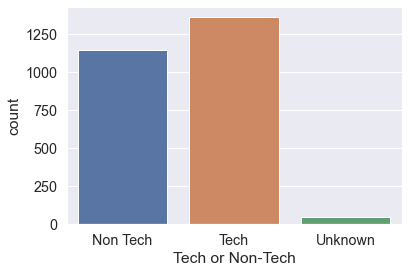

In [170]:
sns.countplot(data=combined_set, x='Tech or Non-Tech')

In [171]:
combined_set.groupby(['Tech or Non-Tech'])['Amount'].mean()

Tech or Non-Tech
Non Tech    92308175.4
Tech       152016252.4
Unknown      6759442.7
Name: Amount, dtype: float64

In [172]:
median = combined_set['Amount'].median()
highly_funded = combined_set.query('Amount > {}'.format(median))
highly_funded['Tech or Non-Tech'].value_counts()

Tech        592
Non Tech    453
Unknown      15
Name: Tech or Non-Tech, dtype: int64

## 1. How many companies were funded each year?

In [127]:
combined_set['Funding Year'].value_counts()

2021    1033
2020     905
2018     525
2019      87
Name: Funding Year, dtype: int64

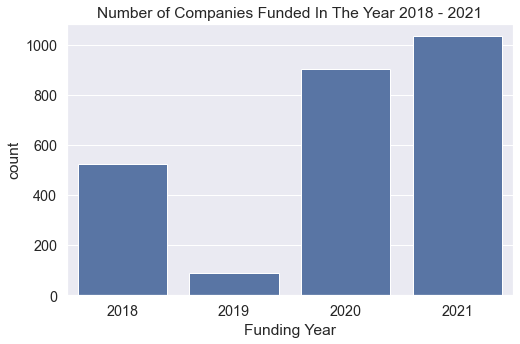

In [128]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Funding Year',  
    data=combined_set, 
    color=base_color)

plt.title('Number of Companies Funded In The Year 2018 - 2021')
plt.show()

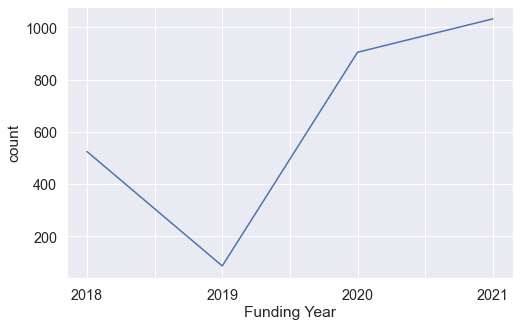

In [129]:
plt.figure(figsize=(8, 5))
funding_year_count = combined_set.groupby(['Funding Year'])['Company Name'].count()
funding_year_count.plot()
plt.ylabel('count');

### 2. What was the highest average funding yearly? 

In [130]:
average_funding_year= combined_set.groupby(['Funding Year']).agg({'Amount': 'mean'})
average_funding_year.reset_index(inplace=True)
average_funding_year

Funding Year      Amount
0         2018  12932425.1
1         2019  44139109.3
2         2020 128756976.0
3         2021 187168251.1

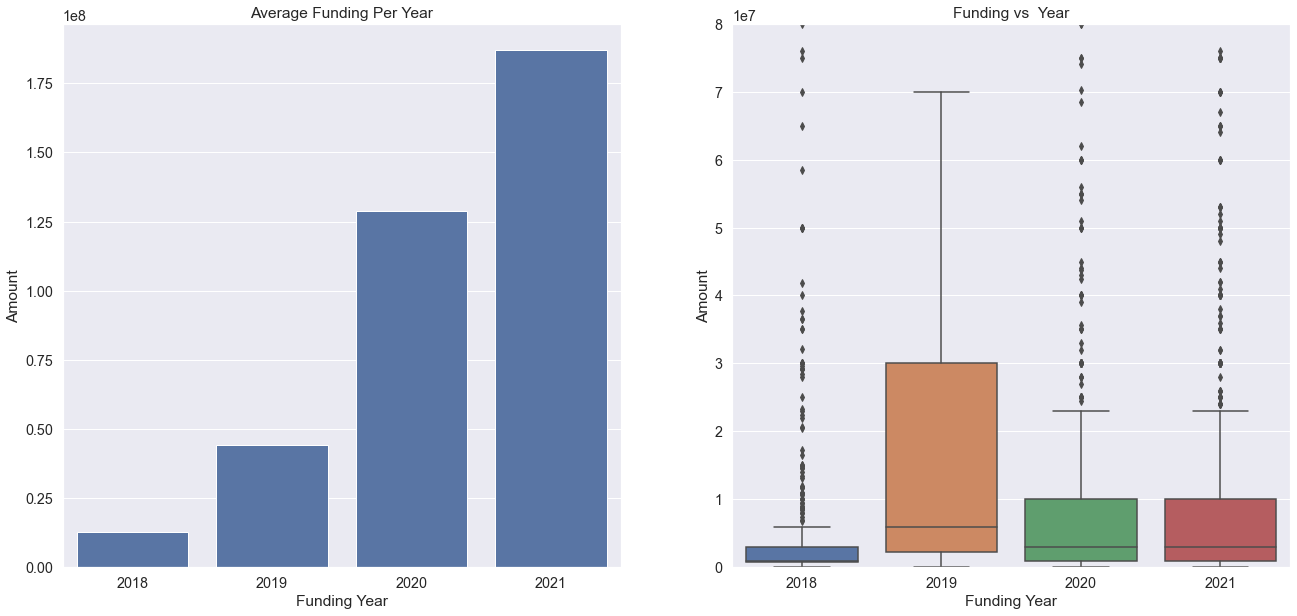

In [131]:
plt.figure(figsize=(22, 10))
plt.subplot(1, 2, 1)
sns.barplot(
    data=average_funding_year,
    x='Funding Year',
    y='Amount',
    color=base_color)
plt.title('Average Funding Per Year')


plt.subplot(1, 2, 2)
sns.boxplot(data=combined_set, y='Amount', x='Funding Year')
plt.title('Funding vs  Year');
plt.ylim(-10,80000000);

In [132]:
sum_funding_year= combined_set.groupby(['Funding Year']).agg({'Amount': 'sum'})
sum_funding_year.reset_index(inplace=True)
sum_funding_year

Funding Year         Amount
0         2018   6789523177.0
1         2019   3310433200.0
2         2020  87554743704.0
3         2021 168451426000.0

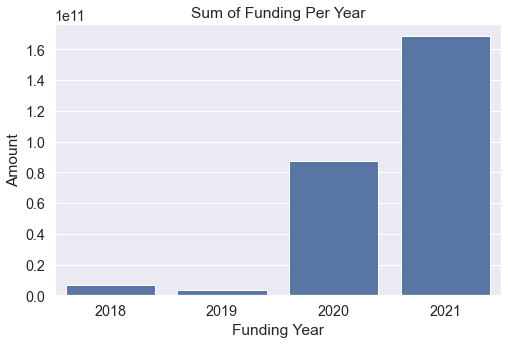

In [133]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=sum_funding_year,
    x='Funding Year',
    y='Amount',
    color=base_color)


plt.title('Sum of Funding Per Year')
plt.show()

## 3. Top Ten Cities with Most Startups

In [134]:

top_ten_HQ = combined_set['Headquarters'].value_counts().head(10).sort_values()
top_ten_HQ

Hyderabad     75
Gurgaon       78
Noida         79
Delhi         79
Chennai       95
Pune          99
Gurugram     195
New Delhi    201
Mumbai       426
Bangalore    736
Name: Headquarters, dtype: int64

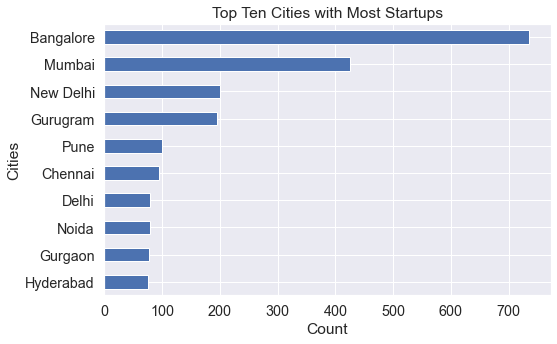

In [135]:
plt.figure(figsize=(8, 5))
top_ten_HQ.plot(kind='barh')
plt.title('Top Ten Cities with Most Startups')
plt.xlabel('Count')
plt.ylabel('Cities');

## 4. Did Companies receive multiple funding through out the time period. 

In [136]:
duplicate_company_df=combined_set[combined_set.duplicated('Company Name')]

duplicate_company_name=duplicate_company_df['Company Name'].unique().tolist()

duplicate_company_name

['Kaleidofin',
 'HungerBox',
 'Licious',
 'Asteria Aerospace',
 'Trell',
 'Awign Enterprises',
 'Freightwalla',
 'Ninjacart',
 'Origo',
 'Stanza Living',
 'Nivesh.com',
 'Sportido',
 'Ola',
 'Spinny',
 'Gramophone',
 'Rupeek',
 'Zomato',
 'MobiKwik',
 'Rivigo',
 'Infra.Market',
 'Signzy',
 'Mobile Premier League (MPL)',
 'Nykaa',
 'NIRA',
 "Byju's",
 'GalaxyCard',
 'LivFin',
 'Eggoz',
 'Steradian Semiconductors',
 'Charcoal Eats',
 'Leena AI',
 'Freshokartz',
 'Ultraviolette Automotive',
 'Slintel',
 'Disprz',
 'NirogStreet',
 'Pristyn Care',
 'Vivriti Capital',
 'Dream11',
 'Fasal',
 'Pitstop',
 'ShareChat',
 'Cub McPaws',
 'Moms Co',
 'InCred',
 'Toppr',
 'Dunzo',
 'Livspace',
 'Cell Propulsion',
 'Groww',
 'OckyPocky',
 'Hippo Video',
 'Hasura',
 'Flickstree',
 'Sarva',
 '6Degree',
 'Avail Finance',
 'HomeLane',
 'Eduvanz',
 'Vedantu',
 'Magicpin',
 'Yumlane',
 'Cuemath',
 'Zolostays',
 'Aye Finance',
 'Zetwerk',
 'Milkbasket',
 'GoMechanic',
 'LetsTransport',
 'HealthPlix',
 'Woode

In [137]:
recurring_companies_yearly = combined_set[combined_set['Company Name'].isin(duplicate_company_name)].sort_values('Company Name')
recurring_companies_yearly

Company Name     Funding Stage  \
205                       6Degree              Seed   
2269                      6Degree           Unknown   
1064                      6Degree           Unknown   
2235                      Agnikul          Series A   
1348                      Agnikul      Pre Series A   
2514                     Anveshan              Seed   
852                      Anveshan          Pre Seed   
2223                      Apna.co           Unknown   
1010                      Apna.co          Series A   
612                    Aqgromalin           Unknown   
1980                   Aqgromalin              Seed   
558             Asteria Aerospace           Unknown   
87              Asteria Aerospace              Seed   
2509        Atomberg Technologies           Unknown   
681         Atomberg Technologies          Series B   
304                 Avail Finance          Series A   
1071                Avail Finance          Series B   
2273                Avail Finance    Debt Financing   
635             Awign Enterprises           Unknown   
574             Awign Enterprises          Series A   
215             Awign Enterprises              Seed   
375                   Aye Finance    Debt Financing   
1158                  Aye Finance          Series E   
2413              BASIC Home Loan          Series A   
826               BASIC Home Loan              Seed   
130                        BYJU’S    Private equity   
2103                       BYJU’S           Unknown   
2504                   BharatAgri          Series A   
802                    BharatAgri      Pre Series A   
1647                     BharatPe    Debt Financing   
1390                     BharatPe          Series C   
823                       Biddano      Pre Series A   
2537                      Biddano      Pre Series A   
554                         Bijak              Seed   
1291                        Bijak          Series A   
2217                       Bijnis           Unknown   
1128                       Bijnis          Series A   
1066                       Bikayi              Seed   
2528                       Bikayi          Series A   
261               Biryani By Kilo              Seed   
1268              Biryani By Kilo          Series B   
1453                      Bizongo          Series C   
1520                      Bizongo          Series C   
1909                    BlackSoil           Unknown   
759                     BlackSoil           Unknown   
1257                    Blackbuck           Unknown   
447                     Blackbuck          Series D   
65         Bombay Shaving Company          Series A   
1866       Bombay Shaving Company           Unknown   
1298                         Box8           Unknown   
573                          Box8           Unknown   
734                        Byju's           Unknown   
541                        Byju's           Unknown   
715                        CARS24          Series E   
2468                       CARS24          Series F   
1717                  CHARGE+ZONE           Unknown   
782                   CHARGE+ZONE      Pre Series A   
1575                         CRED          Series D   
695                          CRED          Series C   
1328                     Camp K12              Seed   
1617                     Camp K12           Unknown   
2064                Capital Float           Unknown   
1299                Capital Float           Unknown   
1766                Captain Fresh          Series B   
1079                Captain Fresh      Pre Series A   
596                      CarDekho          Series D   
2374                     CarDekho          Series E   
2059                     Cashfree           Unknown   
710                      Cashfree          Series B   
2216                      Cashify           Unknown   
964                       Cashify    Debt Financing   
1029              Cell Propulsion      Pre Series A   
2073  

In [138]:
pd.set_option('display.min_rows', None)
multiple_fundings = combined_set.groupby(['Company Name']).agg({'Amount': 'sum', 'Company Name':'count'})
multiple_fundings.rename(columns={'Company Name': 'Number of Fundings'}, inplace=True)
multiple_fundings['Number of Fundings'] = multiple_fundings['Number of Fundings'].astype(str)
multiple_fundings.reset_index(drop=False).sort_values(by='Number of Fundings', ascending=False).head()


Company Name      Amount Number of Fundings
1741       Spinny 169700000.0                  4
1354        Origo  32480000.0                  4
1908        Trell  59250000.0                  4
1323    OckyPocky   1400000.0                  3
1663    ShareChat 639230000.0                  3

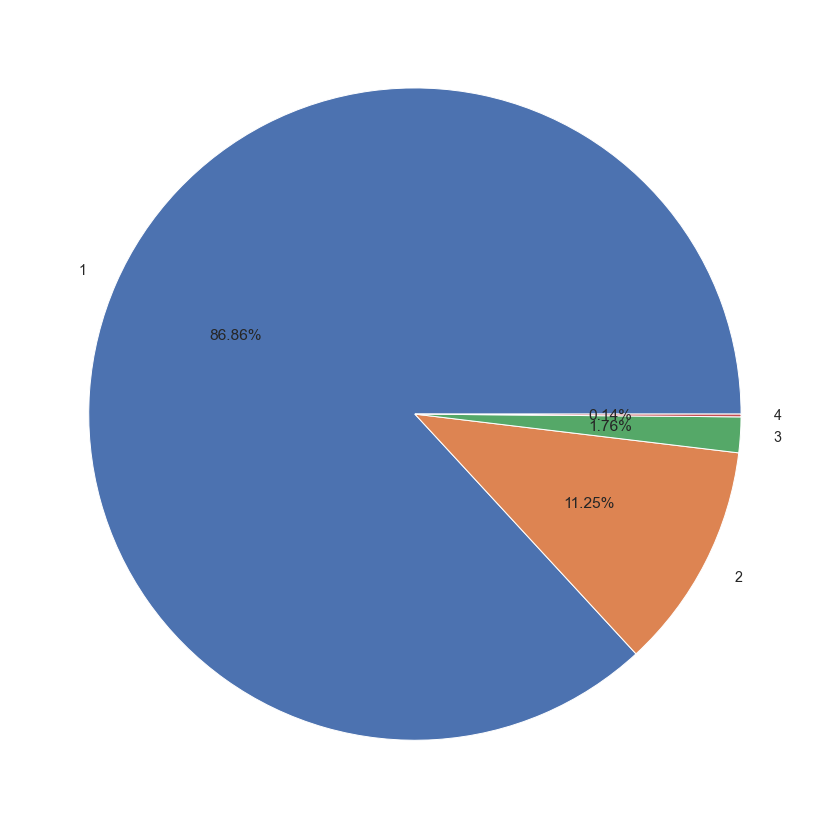

In [139]:
plt.figure(figsize=(15, 15))
plt.pie(multiple_fundings['Number of Fundings'].value_counts(), autopct='%1.2f%%', labels=['1', '2', '3', '4'])
plt.show();

### 5. Which sector had most startups?

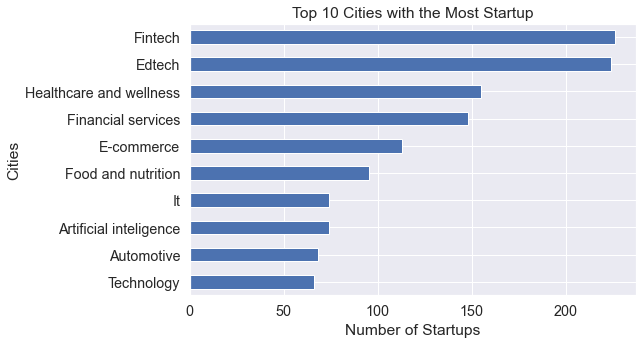

In [140]:
Top_ten_sectors = combined_set['New Sector'].value_counts().head(10)

plt.figure(figsize=(8, 5))
Top_ten_sectors.sort_values().plot(kind='barh')
plt.title('Top 10 Cities with the Most Startup')
plt.xlabel('Number of Startups')
plt.ylabel('Cities');

In [141]:
combined_set.groupby('New Sector').agg({'Amount': 'mean', 'New Sector': 'count'}).rename(columns=({'New Sector': 'count'})).sort_values(by='count', ascending=False)

Amount  count
New Sector                                              
Fintech                               797497681.8    226
Edtech                                 23714173.9    224
Healthcare and wellness                12232113.6    155
Financial services                     18432752.5    148
E-commerce                             30150558.0    113
Food and nutrition                      8500301.3     95
Artificial inteligence                 13032169.7     74
It                                      7717016.6     74
Automotive                             33246335.5     68
Technology                             78114338.0     66
Agriculture technology                 11651566.0     60
Saas                                   20052891.3     59
Healthtech                             18794311.9     57
Consumer goods and services             4726958.1     49
Logistics and supply chain             21539142.9     46
Unknown                                 6759442.7     46
Software                               16751142.9     43
Gaming                                 20121657.1     40
Fashion                                11677329.0     38
Iot                                     9899611.3     33
B2b                                    13902571.4     25
Apps                                    6307380.4     23
Retail                               3351789523.8     22
Biotechnology                          18868200.0     20
Education                              44771773.0     20
Media                                  30836470.6     20
Housing and real estate                 8172136.9     20
Entertainment                          22038588.2     19
Hospitality                            51443000.0     19
Beauty and cosmetics                   10064875.0     18
Transportation                         29763835.7     17
Foodtech                               16463358.3     17
Aerospace                              30658909.1     15
Analytics                               2573870.8     15
Energy                                 56557000.0     14
Delivery services                     196772700.0     14
Automation tech                        11915927.3     13
Deeptech                                2762222.2     11
Sports                                  7119625.0     11
Consulting                              4827777.8     10
Digital media                           1296817.5     10
Insurance                             121880555.6     10
Social media                          121714285.7      9
Agriculture                             3796888.9      9
Human resources                         9643250.0      9
Ev                                     17300000.0      9
Cloud company                          23174000.0      8
Blockchain                              1321428.6      7
Home product and servies               34485714.3      7
Renewable energy                       12250000.0      7
Co-working and collaboration            2856666.7      7
Hr tech                                 7526357.1      7
Travel                                 11366666.7      6
Ar/vr                                   2275000.0      6
Content creation and management         2251725.0      6
Cleantech                               6798666.7      6
Construction                           38869166.7      6
Video streaming and sharig              5600000.0      6
Social commerce                        13010000.0      6
Rental                                  1527000.0      6
Medtech                                 1975000.0      5
Eye wear                               45812000.0      5
Marketing                               5598400.0      5
Legaltech                               1525000.0      5
Farming                                 5666666.7      5
Mobility                              119768000.0      5
Advertising                              917680.0      5
Tourism                                 1100000.0      5
Interior design                        21250000.0    

In [142]:
combined_set.groupby('New Sector')['Amount'].mean().sort_values(ascending=False)

New Sector
Retail                                 3351789523.8
Multinational conglomerate company     2200000000.0
Fintech                                 797497681.8
Renewable player                        390000000.0
Health insurance                        210000000.0
Delivery services                       196772700.0
Mechanical & industrial engineering     150000000.0
Insurance                               121880555.6
Social media                            121714285.7
Mobility                                119768000.0
E-marketing                             112050000.0
Technology                               78114338.0
E store                                  60000000.0
Energy                                   56557000.0
Co-living                                56000000.0
Biopharma                                53750000.0
Hospitality                              51443000.0
Fantasy sports                           50300000.0
Online storytelling                      48000000.0
E

### 6. Which Investors funded more startups

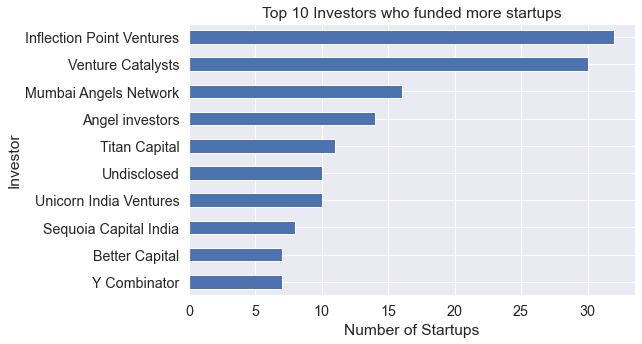

In [143]:
# Code here
Top_10_investors = combined_set['Investors'].value_counts().head(10)

plt.figure(figsize=(8, 5))
Top_10_investors.sort_values().plot(kind='barh')
plt.title('Top 10 Investors who funded more startups')
plt.xlabel('Number of Startups')
plt.ylabel('Investor');

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

### 7. Is there any correlation between the features?: 

In [144]:
# lets create dataframe where columns with object data types have cateforized using random numerical values
df_categorized = combined_set.copy()
for col in df_categorized.columns:
    if (df_categorized[col].dtype == 'object'):
        df_categorized[col] = df_categorized[col].astype('category')
        df_categorized[col] = df_categorized[col].cat.codes
        
# lets sort them by gross to be able to confirm change with the df_sorted_by_gross dataframe        
df_categorized.sort_values(by='Amount', ascending=False)  

Company Name  Funding Stage  Headquarters         Amount  Funding Year  \
1590            70              3            78 150000000000.0             3   
878           1556             28            78  70000000000.0             2   
915           1726             28            21   3000000000.0             2   
926           1553             28            78   2200000000.0             2   
101           1818             26            10   1000000000.0             0   
1051           581             22            78    825000000.0             2   
1570          1818             28            10    800000000.0             3   
900           1555             28            78    800000000.0             2   
90            1598             16            78    742000000.0             0   
608           1361             28            43    693000000.0             1   
627           2153             28            42    660000000.0             2   
541            272             28            -1    540000000.0             1   
130            163             16            10    540000000.0             0   
1587          1663             28            10    500000000.0             3   
1749          1330             28            10    500000000.0             3   
924            273             28            10    500000000.0             2   
1668          2002             28            10    450000000.0             3   
2468           275             24            43    450000000.0             3   
2157           502             28            78    400000000.0             3   
901           2142             28           115    400000000.0             2   
657            149             28            10    390000000.0             2   
493            278             16            78    365000000.0             0   
1577          1412             23            78    350000000.0             3   
2079           162             28            10    350000000.0             3   
604           1330             28            10    311000000.0             1   
1595          1168             28            10    300000000.0             3   
1424           660             23            95    296000000.0             2   
420           2021             16            46    292000000.0             0   
1905          1940             28            10    280000000.0             3   
534           1075             25            28    275000000.0             1   
2039           473             26            43    270000000.0             3   
1750          1210             25            10    266000000.0             3   
2424            35             22            10    255000000.0             3   
2374           292             23            54    250000000.0             3   
2166           667             28            23    234000000.0             3   
558            118             28            10    230000000.0             1   
1644          1460             22            10    225000000.0             3   
1681          1767             28            10    225000000.0             3   
520           1940             21            10    225000000.0             0   
932            503             28            78    225000000.0             2   
419            912             10            78    224723200.0             0   
1957          1075             28            31    220000000.0             3   
1575           279             22            10    215000000.0             3   
1454            96             22            10    210000000.0             2   
443           2153             17            42    210000000.0             0   
388           1581              2            60    210000000.0             0   
734            272             28            10    200000000.0             2   
715            275             23            46    200000000.0             2   
1940           510             28            43    200000000.0             3   
2181  

In [145]:
# Code here
correlation = df_categorized.corr()
correlation

Company Name  Funding Stage  Headquarters  Amount  \
Company Name               1.0            0.0          -0.0    -0.0   
Funding Stage              0.0            1.0          -0.0    -0.0   
Headquarters              -0.0           -0.0           1.0     0.0   
Amount                    -0.0           -0.0           0.0     1.0   
Funding Year              -0.0            0.2           0.0     0.0   
Funding Status             0.0            0.1          -0.0    -0.0   
Year Founded               0.0           -0.2          -0.1    -0.0   
Founders                  -0.0            0.2          -0.0     0.0   
Investors                 -0.0            0.1          -0.0    -0.0   
New Sector                 0.0            0.0          -0.0     0.0   
Tech or Non-Tech          -0.0           -0.0          -0.1     0.0   
Company Age               -0.0            0.2           0.1     0.0   
Age at Funding            -0.0            0.2           0.1     0.0   

                  Funding Year  Funding Status  Year Founded  Founders  \
Company Name              -0.0             0.0           0.0      -0.0   
Funding Stage              0.2             0.1          -0.2       0.2   
Headquarters               0.0            -0.0          -0.1      -0.0   
Amount                     0.0            -0.0          -0.0       0.0   
Funding Year               1.0             0.0          -0.4       0.6   
Funding Status             0.0             1.0           0.0       0.1   
Year Founded              -0.4             0.0           1.0      -0.3   
Founders                   0.6             0.1          -0.3       1.0   
Investors                  0.5             0.1          -0.3       0.3   
New Sector                 0.1             0.0          -0.0       0.1   
Tech or Non-Tech           0.0             0.1          -0.0       0.0   
Company Age               -0.1            -0.0          -1.0      -0.0   
Age at Funding            -0.0            -0.1          -1.0      -0.0   

                  Investors  New Sector  Tech or Non-Tech  Company Age  \
Company Name           -0.0         0.0              -0.0         -0.0   
Funding Stage           0.1         0.0              -0.0          0.2   
Headquarters           -0.0        -0.0              -0.1          0.1   
Amount                 -0.0         0.0               0.0          0.0   
Funding Year            0.5         0.1               0.0         -0.1   
Funding Status          0.1         0.0               0.1         -0.0   
Year Founded           -0.3        -0.0              -0.0         -1.0   
Founders                0.3         0.1               0.0         -0.0   
Investors               1.0         0.0               0.1         -0.0   
New Sector              0.0         1.0               0.0         -0.0   
Tech or Non-Tech        0.1         0.0               1.0         -0.0   
Company Age            -0.0        -0.0              -0.0          1.0   
Age at Funding         -0.0        -0.0              -0.0          1.0   

                  Age at Funding  
Company Name                -0.0  
Funding Stage                0.2  
Headquarters                 0.1  
Amount                       0.0  
Funding Year                -0.0  
Funding Status              -0.1  
Year Founded                -1.0  
Founders                    -0.0  
Investors                   -0.0  
New Sector                  -0.0  
Tech or Non-Tech            -0.0  
Company Age                  1.0  
Age at Funding               1.0

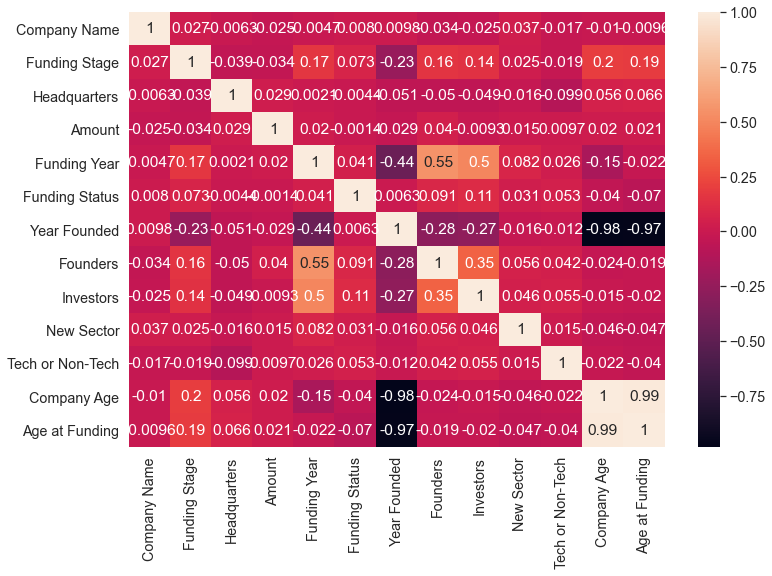

In [146]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True)
plt.show()

### 8. What is the relationship between the Amount and the top 4 Funding Stage

In [147]:
combined_set['Funding Stage'].value_counts().head(5)

Unknown         809
Seed            696
Series A        277
Pre Series A    264
Series B        118
Name: Funding Stage, dtype: int64

In [148]:
top_stages = combined_set[combined_set['Funding Stage'].isin(['Seed', 'Series A', 'Pre Series A', 'Series B'])]
top_stages.head()

Company Name Funding Stage Headquarters    Amount Funding Year  \
0  TheCollegeFever          Seed    Bangalore  250000.0         2018   
1  Happy Cow Dairy          Seed       Mumbai  584000.0         2018   
2       MyLoanCare      Series A      Gurgaon  949000.0         2018   
4         Eunimart          Seed    Hyderabad 1000000.0         2018   
5           Hasura          Seed    Bengaluru 1600000.0         2018   

  Funding Status Year Founded Founders Investors          New Sector  \
0      Disclosed         <NA>      NaN       NaN     Brand marketing   
1      Disclosed         <NA>      NaN       NaN         Agriculture   
2      Disclosed         <NA>      NaN       NaN  Financial services   
4      Disclosed         <NA>      NaN       NaN          E-commerce   
5      Disclosed         <NA>      NaN       NaN       Cloud company   

  Tech or Non-Tech  Company Age  Age at Funding  
0         Non Tech         <NA>            <NA>  
1         Non Tech         <NA>            <NA>  
2         Non Tech         <NA>            <NA>  
4         Non Tech         <NA>            <NA>  
5             Tech         <NA>            <NA>

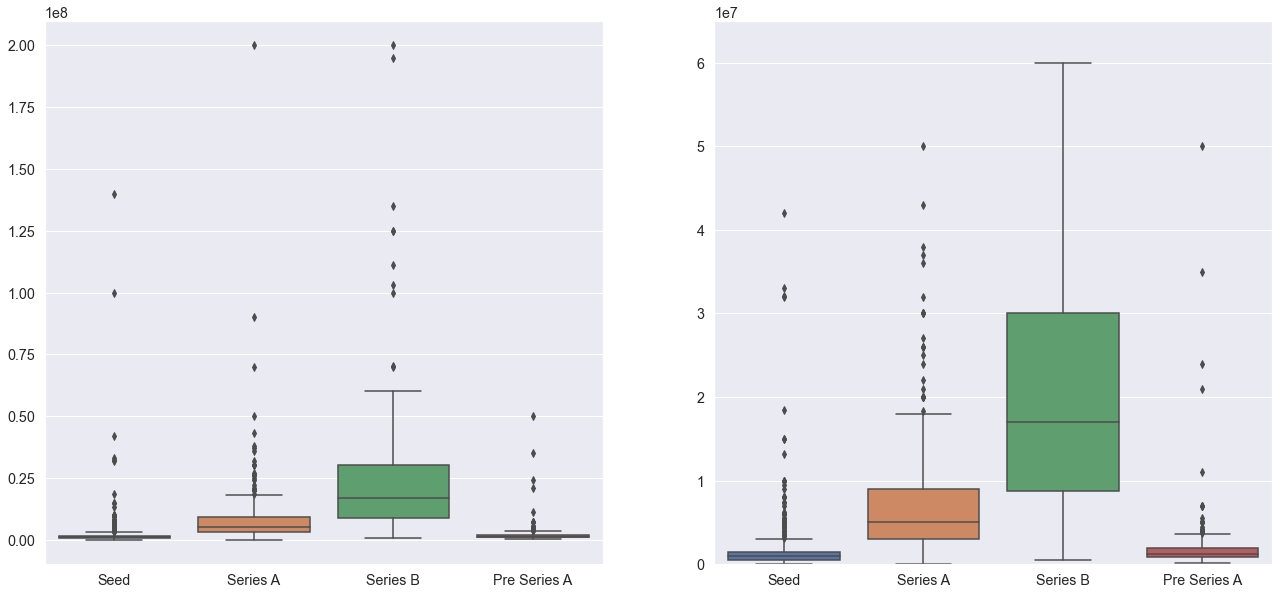

In [149]:
plt.figure(figsize=[22, 10])
plt.subplot(1, 2, 1)
sns.boxplot(data=top_stages, y='Amount', x='Funding Stage')
plt.title('')
plt.xlabel('')
plt.ylabel('');


plt.subplot(1, 2, 2)
sns.boxplot(data=top_stages, y='Amount', x='Funding Stage')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.ylim(-10,65000000);


### 9. What is the correlation between Company Age at the time of funding and Amount

In [150]:
combined_set['Company Age'].unique()

<IntegerArray>
[<NA>,    8,   18,    9,   12,    4,    3,    5,   11,    7,    6,   10,   14,
    2,   24,   15,   40,   13,   27,   16,   44,   23,   28,   17,   49,   20,
   21,    1,   29,   33,   22,   19,   31,   38,   59]
Length: 35, dtype: Int64

In [151]:
amount_fund_year_dropna = combined_set.dropna(how='any', subset=['Amount', 'Age at Funding'])
amount_fund_year_dropna

Company Name   Funding Stage  \
526                            Ruangguru        Series C   
528                             HomeLane        Series D   
529                             Nu Genes         Unknown   
532                             Kratikal    Pre Series A   
534                             Lenskart        Series G   
537                           Kaleidofin        Series A   
538                            JobSquare            Seed   
540                               LivFin         Unknown   
541                               Byju's         Unknown   
542                           Zest Money        Series B   
543                              Witblox         Unknown   
545                           SalaryFits         Unknown   
546                         Pristyn Care        Series B   
547                          Springboard    Pre Series A   
549                              Medlife         Unknown   
550                              Seekify            Seed   
551                     Toffee Insurance        Series A   
553                            HungerBox        Series C   
554                                Bijak            Seed   
555                              Licious        Series E   
558                    Asteria Aerospace         Unknown   
559                               Rivigo        Series F   
560                          HappyEasyGo        Series B   
561                              Zetwerk        Series B   
563                          Freshokartz    Pre Series A   
565                                Trell    Pre Series A   
567                 Bombay Shirt Company         Unknown   
568                              Slintel         Unknown   
573                                 Box8         Unknown   
574                    Awign Enterprises        Series A   
575                              Purplle        Series C   
576                         Freightwalla        Series A   
577                             TapChief    Pre Series A   
578                               eJOHRI    Pre Series A   
583                                Origo         Unknown   
585                         Ecom Express         Unknown   
586                        Stanza Living         Unknown   
591                             Lawyered         Unknown   
592                              Cuemath         Unknown   
593                           Nivesh.com         Unknown   
594                                 Zebu            Seed   
596                             CarDekho        Series D   
597                            Shadowfax        Series D   
598                                Credr         Unknown   
600                               Phable         Unknown   
602                             IndyFint        Series A   
603                            Zolostays         Unknown   
604                                  Ola         Unknown   
605                              Zoomcar         Unknown   
608                                  Oyo         Unknown   
609                           GoMechanic        Series B   
610                               Spinny         Unknown   
612                           Aqgromalin         Unknown   
613                             Krayonnz        Pre Seed   
615                                NCOME            Seed   
616                           Gramophone         Unknown   
617                               qZense            Seed   
618                         MyClassboard    Pre Series A   
620                               Rupeek        Series C   
621                            Gig India    Pre Series A   
622                          Slurrp Farm        Series A   
625                             Brila 91         Unknown   
626                           FoodyBuddy         Unknown   
627                               Zomato         Unknown   
628                            OurEye.ai            Seed   
629                           Shiprocket        Series C   
631     

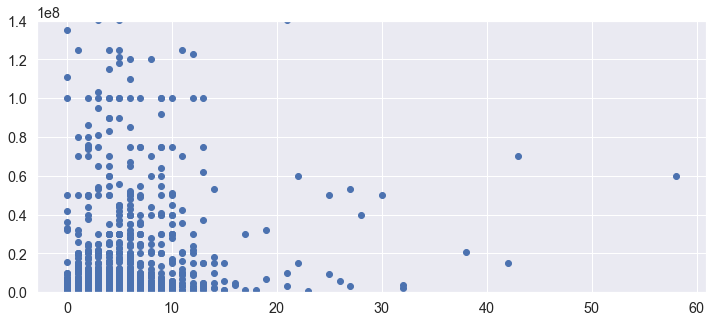

In [152]:
plt.figure(figsize=(12, 5))
plt.scatter(x=amount_fund_year_dropna['Age at Funding'], y=amount_fund_year_dropna['Amount'])
plt.ylim(0, 140000000);

### 10. What is the relationship between the top 3 Cities with more startups, the funding stage and the amount

(0.0, 52000000.0)

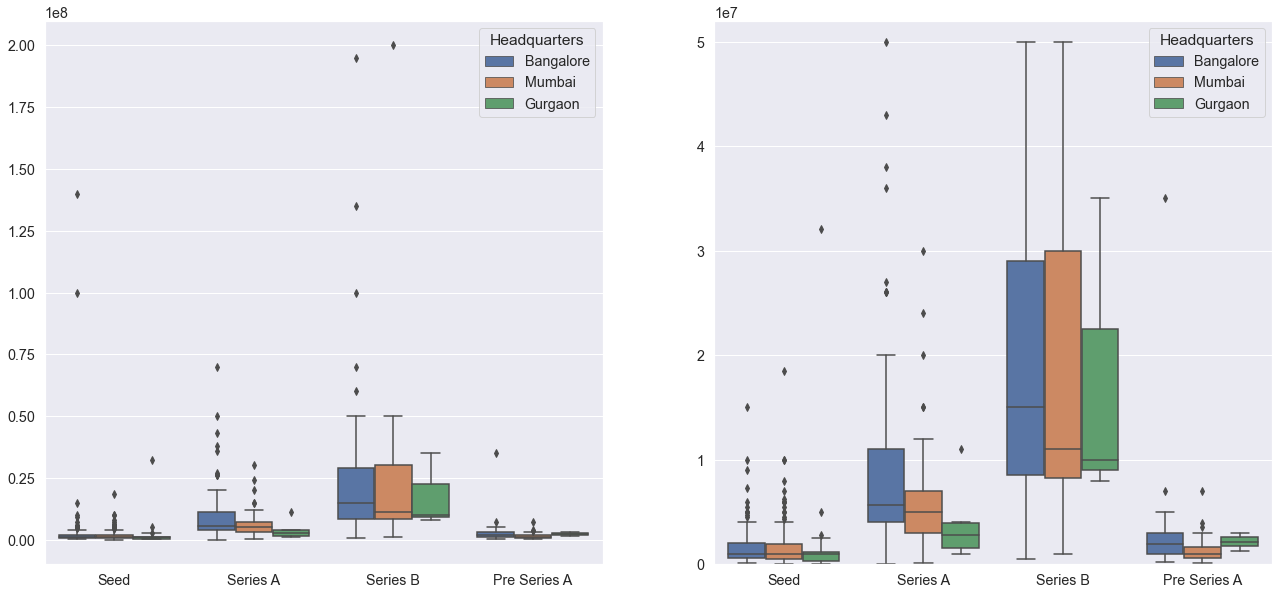

In [153]:
plt.figure(figsize=[22, 10])
plt.subplot(1, 2, 1)
sns.boxplot(data=top_stages[top_stages['Headquarters'].isin(['Bangalore', 'Mumbai', 'Gurgaon'])], y='Amount', x='Funding Stage', hue='Headquarters')
plt.title('')
plt.xlabel('')
plt.ylabel('');


plt.subplot(1, 2, 2)
sns.boxplot(data=top_stages[top_stages['Headquarters'].isin(['Bangalore', 'Mumbai', 'Gurgaon'])], y='Amount', x='Funding Stage', hue='Headquarters')
plt.title('')
plt.xlabel('')
plt.ylabel('');
plt.ylim(0, 52000000)

In [154]:
df_2020[df_2020['Founders'].isin(['Falguni Nayar', 'Byju Raveendran', 'Saurabh Saxena, Pulkit Jain, Anand Prakash, Vamsi Krishna'])]

Company/Brand Founded HeadQuarter      Sector  \
120          Nykaa    2012      Mumbai   Cosmetics   
213          Nykaa    2012      Mumbai  E-commerce   
326         Byju’s    2011   Bangalore      EdTech   
340          Nykaa    2012      Mumbai     Fashion   
494         Byju's    2011   Bangalore      EdTech   
568        Vedantu    2011   Bangalore      Edtech   
618         Byju's    2011   Bangalore      Edtech   
712          Nykaa    2012      Mumbai   Ecommerce   
756        Vedantu     NaN   Bangalore      Edtech   
792        Vedantu     NaN   Bangalore      Edtech   
813          Nykaa    2012      Mumbai   Ecommerce   
920        Vedantu     NaN   Bangalore      Edtech   
935           Byju    2011         NaN      Edtech   
1035          Byju    2011         NaN      Edtech   

                                           What it does  \
120   Nykaa is an online marketplace for different b...   
213   Nykaa is an online marketplace for different b...   
326   An Indian educational technology and online tu...   
340                  Cosmetics & beauty products online   
494                    Provides online learning classes   
568                             Onine learning platform   
618                    Provides online learning classes   
712             Deals in cosmetic and wellness products   
756                             Onine learning platform   
792                             Onine learning platform   
813             Deals in cosmetic and wellness products   
920                             Onine learning platform   
935                    Provides online learning classes   
1035                   Provides online learning classes   

                                               Founders  \
120                                       Falguni Nayar   
213                                       Falguni Nayar   
326                                     Byju Raveendran   
340                                       Falguni Nayar   
494                                     Byju Raveendran   
568   Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...   
618                                     Byju Raveendran   
712                                       Falguni Nayar   
756   Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...   
792   Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...   
813                                       Falguni Nayar   
920   Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...   
935                                     Byju Raveendran   
1035                                    Byju Raveendran   

                                   Investor   Amount($)     Stage  \
120                Alia Bhatt, Katrina Kaif         NaN       NaN   
213         Katrina Kaif, Steadview Capital         NaN       NaN   
326   Owl Ventures, Tiger Global Management 500000000.0       NaN   
340                       Steadview Capital  24700000.0       NaN   
494                              DST Global 122000000.0       NaN   
568                                  Coatue 100000000.0  Series D   
618                                    BOND         NaN       NaN   
712                       Steadview capital   8800000.0       NaN   
756                 KB Global Platform Firm   6800000.0  Series C   
792                          Legend Capital  12500000.0  Series C   
813                       Steadview capital  13137000.0       NaN   
920                             GGV Capital  24000000.0  Series C   
935                        General Atlantic 200000000.0       NaN   
1035                           Tiger Global 200000000.0       NaN   

     Funding Status Year of Funding  
120     Undisclosed            2020  
213     Undisclosed            2020  
326       Disclosed            2020  
340       Disclosed            2020  
494       Disclosed            2020  
568       Disclosed            2020  
618     Undisclosed            2020  
712       Disclosed            2020  
756       Disclosed            2020  
792   

In [155]:
combined_set['Investors'].value_counts()

Inflection Point Ventures                                                                                                                           32
Venture Catalysts                                                                                                                                   30
Mumbai Angels Network                                                                                                                               16
Angel investors                                                                                                                                     14
Titan Capital                                                                                                                                       11
Unicorn India Ventures                                                                                                                              10
Undisclosed                                                                                   

In [156]:
# log_binsize = 1
# # bins_log = 10 ** np.arange(2.4, np.log10(combined_set['Amount'].max()) + log_binsize, log_binsize)
# bins = [np.arange(0, combined_set['Amount'].max()+800, 800)]
# plt.hist(data=combined_set, x='Amount', bins=bins)
# plt.xscale('log')
# plt.show()

In [157]:
combined_set['Amount'].sort_values()

70              876.0
164            1460.0
98             1460.0
258            2920.0
19             7300.0
522            7500.0
95            10000.0
1786          10000.0
1473          12700.0
1474          12700.0
1472          12700.0
166           15000.0
154           17520.0
405           17520.0
75            20000.0
947           20000.0
402           20000.0
211           20440.0
1479          25000.0
488           40000.0
704           40000.0
1056          40900.0
1055          40900.0
1054          43000.0
275           50000.0
230           50000.0
946           54000.0
416           70000.0
222           73000.0
49            73000.0
367           73000.0
310          100000.0
1814         100000.0
613          100000.0
2299         100000.0
2388         100000.0
852          100000.0
2270         100000.0
2437         100000.0
591          100000.0
1528         100000.0
74           100000.0
1561         100000.0
1558         100000.0
569          100000.0
2065      

In [158]:
sector_group.sort_values().plot(kind='barh')

NameError: name 'sector_group' is not defined